# House Prices - Advanced Regression Techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn.impute import SimpleImputer
from IPython.display import display, HTML
import seaborn as sns
from matplotlib.patches import Patch


## 0. Información de las columnas


**SalePrice**: El precio de venta de la propiedad en dólares. Esta es la variable objetivo que se intenta predecir.

### Características generales de la propiedad:

- **MSSubClass**: La clase de edificio
- **MSZoning**: La clasificación general de zonificación
- **LotFrontage**: Pies lineales de calle conectados a la propiedad
- **LotArea**: Tamaño del lote en pies cuadrados
- **Street**: Tipo de acceso a la calle
- **Alley**: Tipo de acceso al callejón
- **LotShape**: Forma general de la propiedad
- **LandContour**: Planicie de la propiedad
- **Utilities**: Tipo de servicios públicos disponibles
- **LotConfig**: Configuración del lote
- **LandSlope**: Pendiente de la propiedad
- **Neighborhood**: Ubicaciones físicas dentro de los límites de la ciudad de Ames
- **Condition1** y **Condition2**: Proximidad a la carretera principal o ferrocarril

### Tipo y estilo de vivienda:

- **BldgType**: Tipo de vivienda
- **HouseStyle**: Estilo de la vivienda
- **OverallQual**: Calidad general del material y acabado
- **OverallCond**: Calificación general de la condición
- **YearBuilt**: Fecha de construcción original
- **YearRemodAdd**: Fecha de remodelación

### Características exteriores:

- **RoofStyle**: Tipo de techo
- **RoofMatl**: Material del techo
- **Exterior1st** y **Exterior2nd**: Revestimiento exterior de la casa
- **MasVnrType**: Tipo de revestimiento de mampostería
- **MasVnrArea**: Área de revestimiento de mampostería en pies cuadrados
- **ExterQual**: Calidad del material exterior
- **ExterCond**: Condición actual del material en el exterior

### Características del sótano:

- **Foundation**: Tipo de cimientos
- **BsmtQual**: Altura del sótano
- **BsmtCond**: Condición general del sótano
- **BsmtExposure**: Paredes del sótano a nivel de jardín o con salida
- **BsmtFinType1** y **BsmtFinType2**: Calidad del área terminada del sótano
- **BsmtFinSF1** y **BsmtFinSF2**: Pies cuadrados terminados de tipo 1 y 2
- **BsmtUnfSF**: Pies cuadrados sin terminar del área del sótano
- **TotalBsmtSF**: Pies cuadrados totales del área del sótano

### Sistemas y comodidades:

- **Heating**: Tipo de calefacción
- **HeatingQC**: Calidad y condición de la calefacción
- **CentralAir**: Aire acondicionado central
- **Electrical**: Sistema eléctrico

### Áreas de vivienda:

- **1stFlrSF**: Pies cuadrados del primer piso
- **2ndFlrSF**: Pies cuadrados del segundo piso
- **LowQualFinSF**: Pies cuadrados terminados de baja calidad (todos los pisos)
- **GrLivArea**: Área habitable sobre el suelo en pies cuadrados

### Baños y habitaciones:

- **BsmtFullBath**: Baños completos en el sótano
- **BsmtHalfBath**: Medios baños en el sótano
- **FullBath**: Baños completos sobre el nivel del suelo
- **HalfBath**: Medios baños sobre el nivel del suelo
- **Bedroom**: Número de dormitorios sobre el nivel del sótano
- **Kitchen**: Número de cocinas
- **KitchenQual**: Calidad de la cocina
- **TotRmsAbvGrd**: Total de habitaciones sobre el nivel del suelo (no incluye baños)
- **Functional**: Calificación de funcionalidad del hogar

### Características adicionales:

- **Fireplaces**: Número de chimeneas
- **FireplaceQu**: Calidad de la chimenea
- **GarageType**: Ubicación del garaje
- **GarageYrBlt**: Año en que se construyó el garaje
- **GarageFinish**: Acabado interior del garaje
- **GarageCars**: Tamaño del garaje en capacidad de autos
- **GarageArea**: Tamaño del garaje en pies cuadrados
- **GarageQual**: Calidad del garaje
- **GarageCond**: Condición del garaje
- **PavedDrive**: Entrada de coches pavimentada
- **WoodDeckSF**: Área de terraza de madera en pies cuadrados
- **OpenPorchSF**: Área de porche abierto en pies cuadrados
- **EnclosedPorch**: Área de porche cerrado en pies cuadrados
- **3SsnPorch**: Área de porche de tres estaciones en pies cuadrados
- **ScreenPorch**: Área de porche con mosquitero en pies cuadrados
- **PoolArea**: Área de la piscina en pies cuadrados
- **PoolQC**: Calidad de la piscina
- **Fence**: Calidad de la cerca
- **MiscFeature**: Característica miscelánea no cubierta en otras categorías
- **MiscVal**: Valor en $ de la característica miscelánea

### Información de venta:

- **MoSold**: Mes de venta
- **YrSold**: Año de venta
- **SaleType**: Tipo de venta
- **SaleCondition**: Condición de la venta


## 1. Método globales

In [2]:
from IPython.display import display, HTML

def scroll_box(contenido, altura_maxima=200):
    display(HTML(f"<div style='max-height: {altura_maxima}px; overflow-y: scroll;'>{contenido}</div>"))

## 2. Importación de librerías y carga de datos

In [3]:
train = pd.read_csv("./info/train.csv")
test =  pd.read_csv("./info/test.csv")

In [4]:
train.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  

[2 rows x 81 columns]

In [5]:
test.head(2)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  

[2 rows x 80 columns]

In [6]:
print(f"Longitud de los datos de test: {len(test)} \nLongitud de los datos de entrenamiento: {len(train)} \nLongitud total de datos: {len(test)+len(train)}")

Longitud de los datos de test: 1459 
Longitud de los datos de entrenamiento: 1460 
Longitud total de datos: 2919


In [7]:
df = pd.concat([train, test], axis=0)
columnas = df.columns

In [8]:
columnas

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 3. Exploración inicial de los datos

### 3.1 Visión general del conjunto de datos

In [9]:
print(f"Hay {df.size} datos")

Hay 236439 datos


In [10]:
scroll_box(df.dtypes.to_frame().to_html() )

In [11]:
# Cantidad de columnas por cada tipo de dato
print("Cantidad de variables por tipo de dato:")
print(df.dtypes.value_counts())

Cantidad de variables por tipo de dato:
object     43
int64      26
float64    12
Name: count, dtype: int64


In [12]:
# Separar columnas por tipo de dato
numericas = df.select_dtypes(include=['int64', 'float64'])
categoricas = df.select_dtypes(include=['object'])


In [13]:
print("Cantidad de variables numéricas:", len(numericas))
print("Variables numéricas:", len(numericas), end="\n\n")
scroll_box(numericas.columns.to_list())

Cantidad de variables numéricas: 2919
Variables numéricas: 2919



In [14]:
print("Cantidad de variables categóricas:", len(categoricas))
print("Variables numéricas:", len(categoricas), end="\n\n")
scroll_box(categoricas.columns.to_list())

Cantidad de variables categóricas: 2919
Variables numéricas: 2919



In [15]:
# Resumen estadístico básico de las variables numéricas
print("Resumen estadístico de variables numéricas:")
scroll_box(df.describe().T.to_html())

Resumen estadístico de variables numéricas:


In [16]:
# Resumen de las variables categóricas
print("Resumen estadístico de solo variables categóricas:")
scroll_box(df.describe(include=['object']).T.to_html())

Resumen estadístico de solo variables categóricas:


In [17]:
# Para ver también las variables categóricas
print("Resumen estadístico incluyendo variables categóricas:")
scroll_box(df.describe(include='all').T.to_html())

Resumen estadístico incluyendo variables categóricas:


### 3.2 Análisis de valores faltantes

In [18]:
# Número total de valores faltantes por columna
valores_faltantes = df.isnull().sum()
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes = valores_faltantes.to_frame()
valores_faltantes.columns = ['Num valores nulos']
valores_faltantes['Es Categórica'] = valores_faltantes.index.isin(categoricas)

scroll_box(valores_faltantes.to_html())

In [19]:
print(f"Número de valores nulos en todo el dataframe: {valores_faltantes.sum().sum()}")

Número de valores nulos en todo el dataframe: 17189


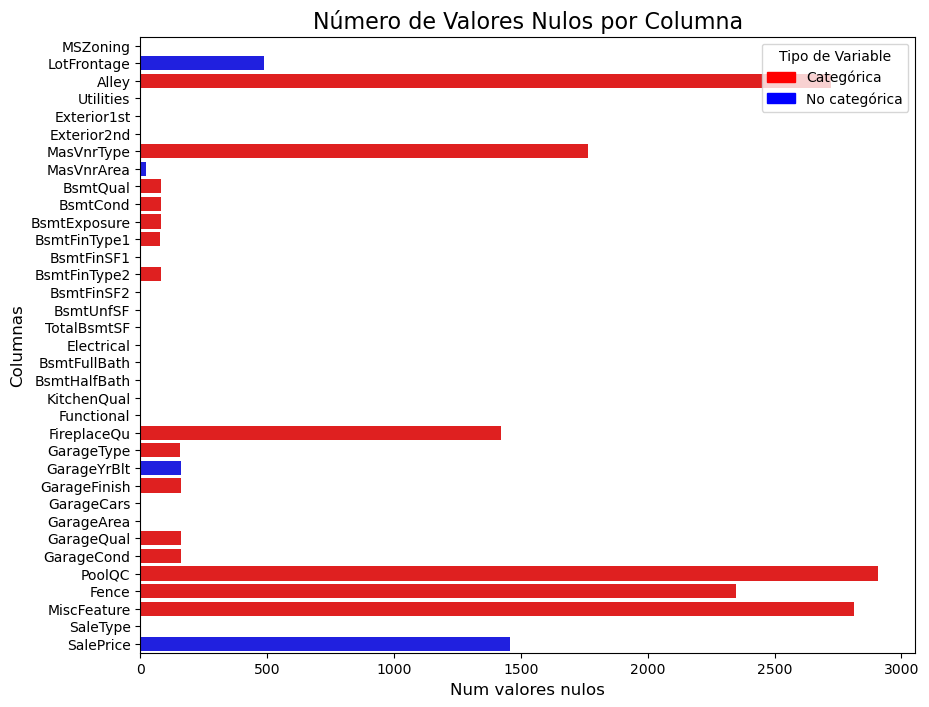

In [20]:
# Visualización de valores (rojo para categóricas, azul para no categóricas)

plt.figure(figsize=(10, 8))
palette = ['red' if x else 'blue' for x in valores_faltantes['Es Categórica']]
sns.barplot(x=valores_faltantes['Num valores nulos'], 
            y=valores_faltantes.index, 
            palette=palette)
plt.title('Número de Valores Nulos por Columna', fontsize=16)
plt.xlabel('Num valores nulos', fontsize=12)
plt.ylabel('Columnas', fontsize=12)
legend_labels = [Patch(color='red', label='Categórica'), 
                 Patch(color='blue', label='No categórica')]
plt.legend(handles=legend_labels, title="Tipo de Variable", loc='upper right')
plt.show()

## 4. Análisis de la variable objetivo (SalePrice)

### 4.1 Distribución de SalePrice

C:\Users\helen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


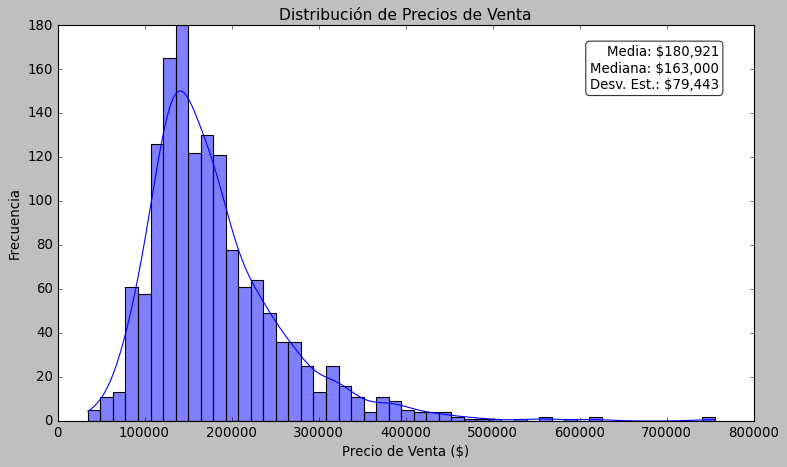


Asimetría: 1.88
Curtosis: 6.54


In [35]:

plt.style.use('classic')
plt.figure(figsize=(10, 6))

# Histograma con distribución normal superpuesta
sns.histplot(data=df, x='SalePrice', bins=50, kde=True)
plt.title('Distribución de Precios de Venta', fontsize=14)
plt.xlabel('Precio de Venta ($)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

stats = f'Media: ${df.SalePrice.mean():,.0f}\n'
stats += f'Mediana: ${df.SalePrice.median():,.0f}\n'
stats += f'Desv. Est.: ${df.SalePrice.std():,.0f}'

plt.text(0.95, 0.95, stats,
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.tight_layout()
plt.show()

print(f"\nAsimetría: {df.SalePrice.skew():.2f}")
print(f"Curtosis: {df.SalePrice.kurtosis():.2f}")

Observaciones:

- Una distribución asimétrica positiva (cola hacia la derecha) esto significa que la mayoría de las casas se concentran en los precios más bajos (entre $100,000 y $200,000)
- Algunos valores atípicos en los precios más altos ya que hay algunos valores atípicos de casas con precios muy altos (por encima de $400,000)
- Una concentración de valores en los rangos de precios más bajos
  
- El pico más alto está alrededor de los $140,000-$160,000, indicando que este es el rango de precio más común

- La frecuencia disminuye rápidamente después de los $300,000
  
- Hay muy pocas casas con precios superiores a $500,000

**Media**: $180,921 - este valor es mayor que la mediana debido a la asimetría

**Mediana**: $163,000 - el 50% de las casas están por debajo de este precio

**Desviación estándar**: $79,443 - indica una dispersión considerable en los precios

### 4.2 Identificación de valores atípico

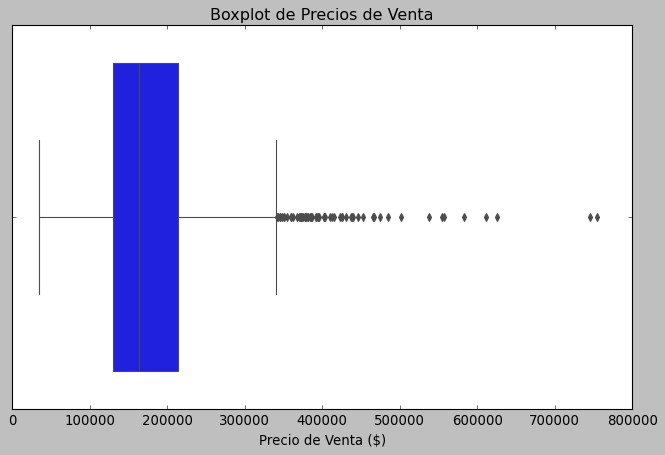

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SalePrice'])
plt.title('Boxplot de Precios de Venta')
plt.xlabel('Precio de Venta ($)')
plt.show()

In [43]:
#  Cálculo de valores atípicos usando el método IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

valores_atipicos = df[(df['SalePrice'] < limite_inferior) | (df['SalePrice'] > limite_superior)]

print("\nEstadísticas de valores atípicos:")
print(f"Límite inferior: ${limite_inferior:,.2f}")
print(f"Límite superior: ${limite_superior:,.2f}")
print(f"Número de valores atípicos: {len(valores_atipicos)}")
print(f"Porcentaje de valores atípicos: {(len(valores_atipicos)/len(df))*100:.2f}%")


Estadísticas de valores atípicos:
Límite inferior: $3,937.50
Límite superior: $340,037.50
Número de valores atípicos: 61
Porcentaje de valores atípicos: 2.09%


In [44]:
# Mostrar los valores atípicos más extremos
print("\nLos 10 precios más altos:")
scroll_box(df.nlargest(10, 'SalePrice')[['SalePrice']].to_html(), 100)

print("\nLos 10 precios más bajos:")
scroll_box(df.nsmallest(10, 'SalePrice')[['SalePrice']].to_html(),100)


Los 10 precios más altos:



Los 10 precios más bajos:


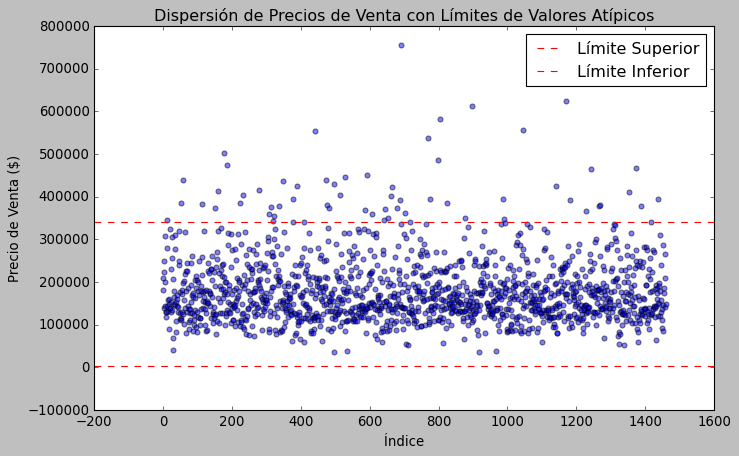

In [45]:
# Gráfico de dispersión con límites
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df['SalePrice'])), df['SalePrice'], alpha=0.5)
plt.axhline(y=limite_superior, color='r', linestyle='--', label='Límite Superior')
plt.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite Inferior')
plt.title('Dispersión de Precios de Venta con Límites de Valores Atípicos')
plt.ylabel('Precio de Venta ($)')
plt.xlabel('Índice')
plt.legend()
plt.show()

Distribución general:

- La mayoría de los precios se concentran entre $100,000 y $200,000
- Hay una banda clara de precios "normales" que forma el grueso de los datos
- Los datos muestran una dispersión bastante consistente a lo largo de todo el índice

Valores atípicos:

- El límite superior (línea roja punteada) está aproximadamente en $340,000
  
- El límite inferior (línea roja punteada) está cerca de $0


- Hay varios valores atípicos por encima del límite superior

  
- El valor más extremo está cerca de $750,000

  
- No hay prácticamente valores atípicos por debajo del límite inferior

## 5. Análisis de características individuales

### 5.1 Variables numéricas

Vamos a analizar que variables numéricas sería interesante excluir. A priori podemos descartar las siguientes:

Variables de identificación:

 - 'Id' - Es solo un identificador y no aporta valor predictivo

Variables temporales que podrían no ser relevantes:

- 'MoSold' (mes de venta)
- 'YrSold' (año de venta)

Variables con demasiados valores cero o muy poca variación (la mayoría de los valores son iguales o muy similares):

In [36]:
# Calcular el porcentaje de ceros en cada variable numérica
zeros = (df.select_dtypes(include=['int64', 'float64']) == 0).sum() / len(df) * 100
variables_con_mucho_cero = zeros[zeros > 0].sort_values(ascending=False).to_frame()
variables_con_mucho_cero.columns = ['Porcentaje de 0s']
scroll_box(variables_con_mucho_cero.to_html())

In [37]:
# Calcular la variación de cada variable numérica
variacion = df.select_dtypes(include=['int64', 'float64']).std() / df.select_dtypes(include=['int64', 'float64']).mean()
variacion = variacion.sort_values().to_frame()
variacion.columns = ['Coeficiente de variación de cada variable:']
scroll_box(variacion.to_html())

Por lo tanto, podemos eliminar: 

- 'PoolArea' (si la mayoría de las casas no tienen piscina)
- '3SsnPorch' (porche de 3 estaciones)
- 'LowQualFinSF' (área de baja calidad)- 'LowQualFinSF' (área de baja calidad)
- 'MiscVal' (valores misceláneos, generalmente muchos ceros)
- 'YrSold' (mencionada antes)

In [38]:
variables_a_excluir = [
    'Id',                 # Identificador
    'MoSold',             # Variable temporal
    'YrSold',             # Variable temporal
    'PoolArea',           # Muchos ceros
    '3SsnPorch',          # Muchos ceros
    'LowQualFinSF',       # Muchos ceros
    'MiscVal',            # Muchos ceros
    'BsmtFinSF2',         # Área secundaria del sótano, menos relevante
    'SalePrice'           # Variable objetivo
]

In [39]:
df.LotFrontage

0        65.0
1        80.0
2        68.0
3        60.0
4        84.0
        ...  
2914     21.0
2915     21.0
2916    160.0
2917     62.0
2918     74.0
Name: LotFrontage, Length: 2919, dtype: float64

In [47]:
df = df.reset_index(drop=True)

for feature in variables_numericas:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribución de {feature}')
    plt.xlabel(feature)
    
    stats = f'Media: {df[feature].mean():.2f}\n'
    stats += f'Mediana: {df[feature].median():.2f}\n'
    stats += f'Asimetría: {df[feature].skew():.2f}'
    
    plt.text(0.95, 0.95, stats,
            transform=plt.gca().transAxes,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.xlabel(feature)
    
    plt.tight_layout()
    plt.show()
    

NameError: name 'variables_numericas' is not defined

In [49]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico de variables numéricas:")
scroll_box(df[variables_numericas].describe().T.to_html())

Resumen estadístico de variables numéricas:


NameError: name 'variables_numericas' is not defined

In [41]:
# Mostrar asimetría y curtosis
print("Asimetría y Curtosis de variables numéricas:")
asimetria_curtosis = pd.DataFrame({
    'Asimetría': df[variables_numericas].skew(),
    'Curtosis': df[variables_numericas].kurtosis()
})
scroll_box(asimetria_curtosis.to_html())

Asimetría y Curtosis de variables numéricas:


NameError: name 'variables_numericas' is not defined

### 5.2 Variables categóricas

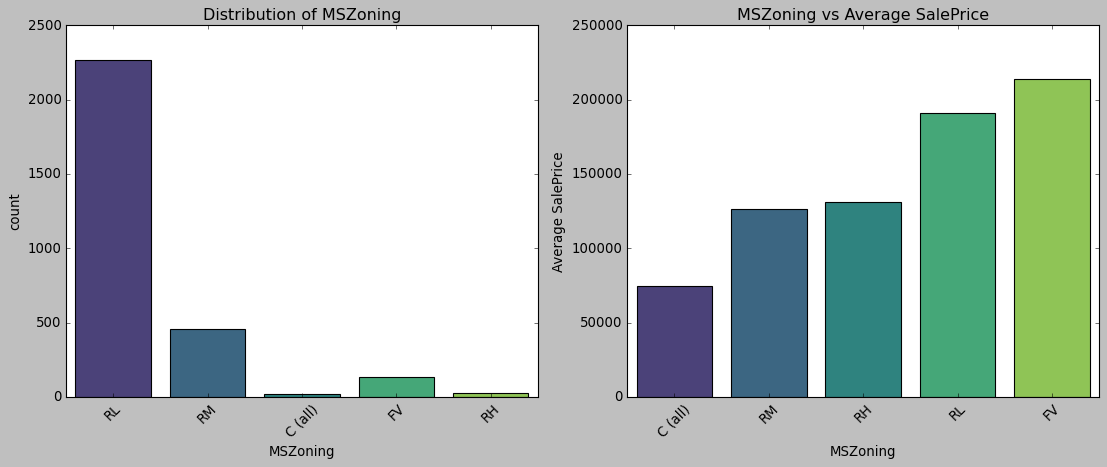

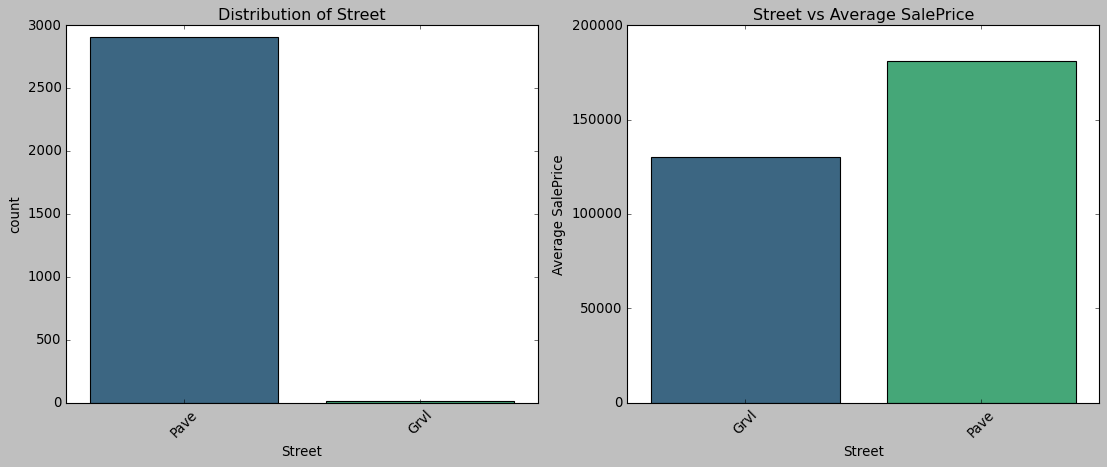

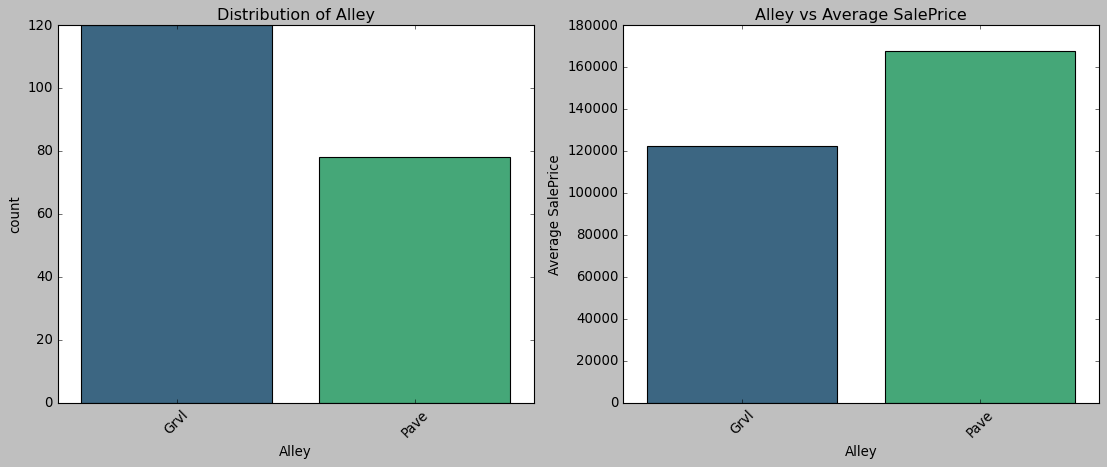

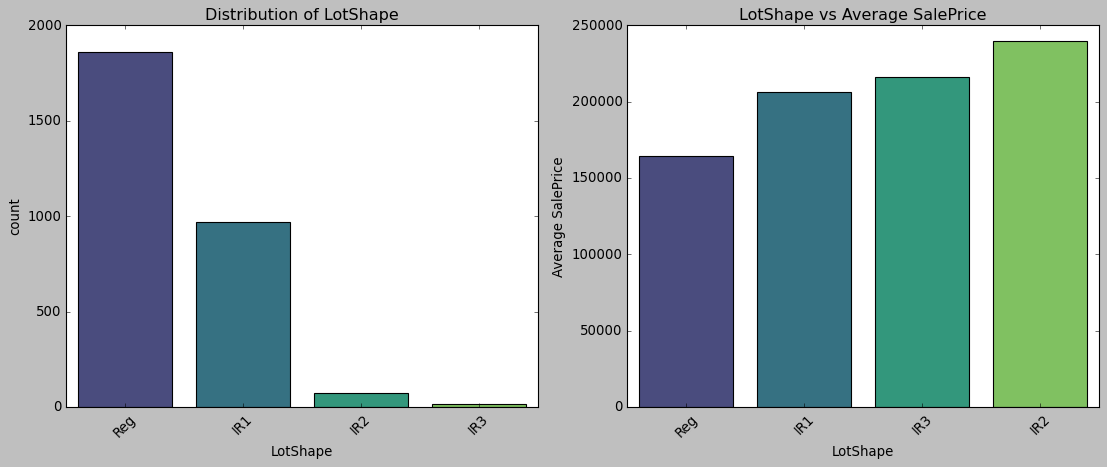

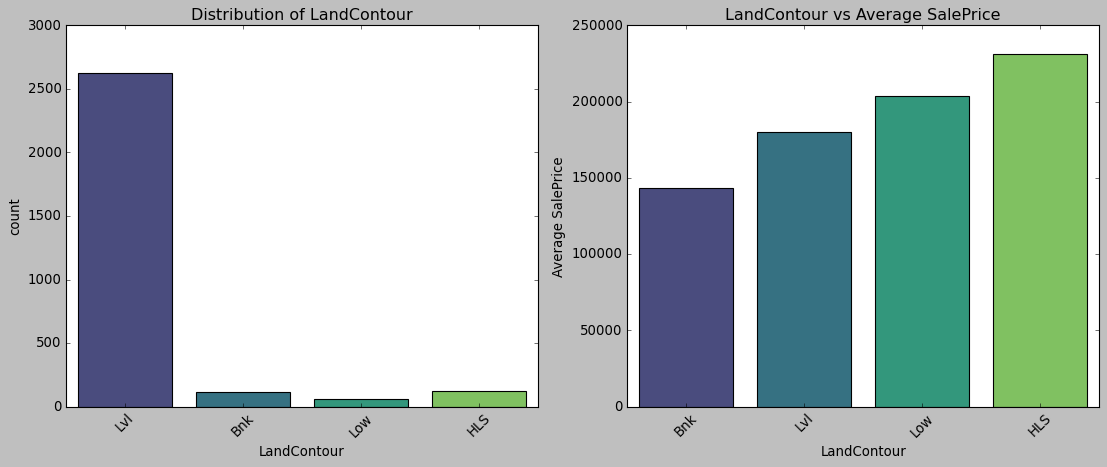

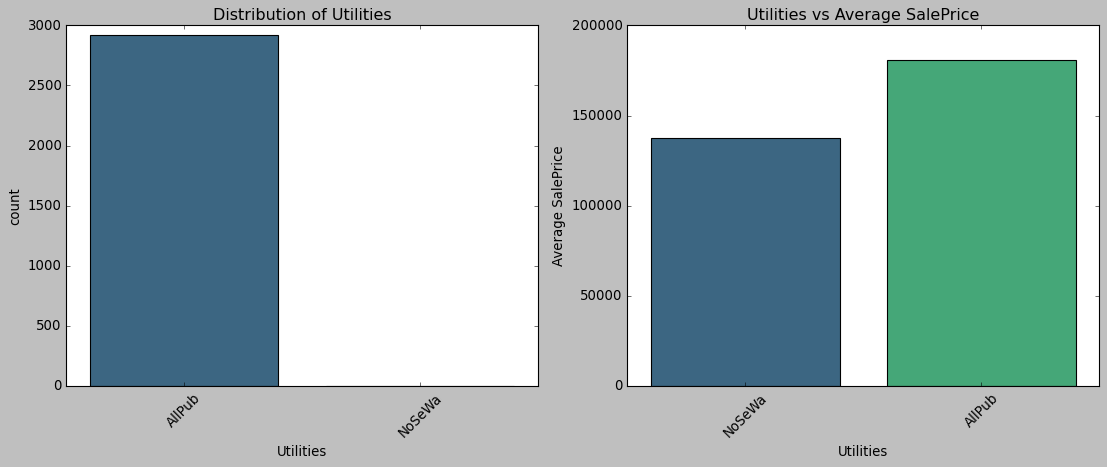

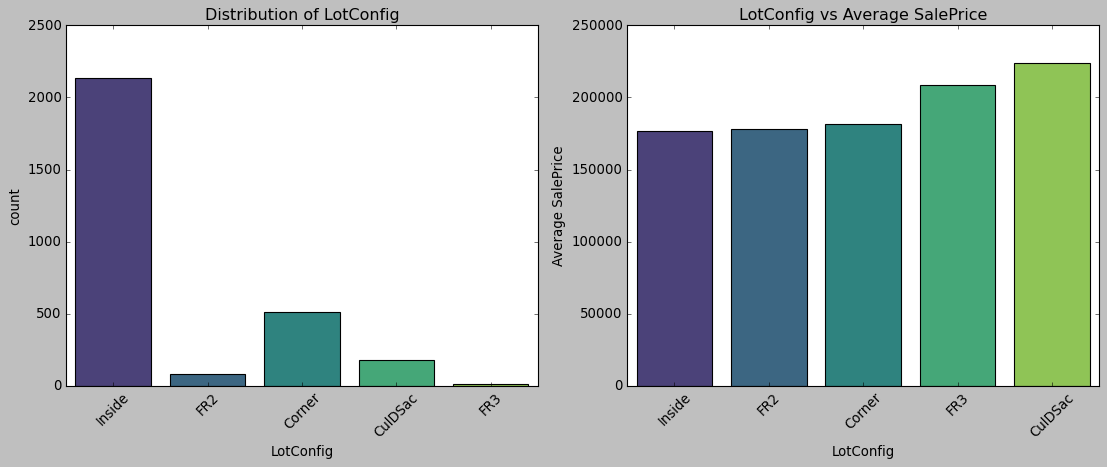

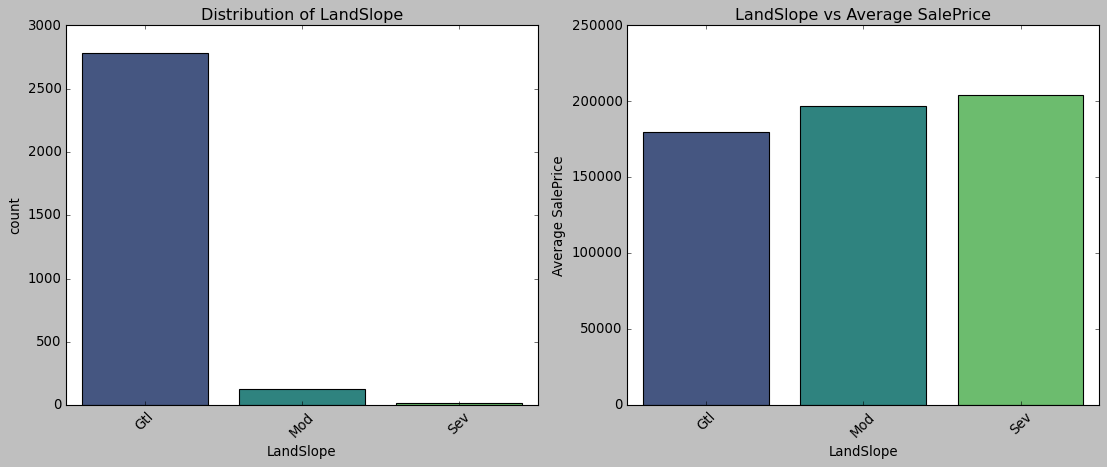

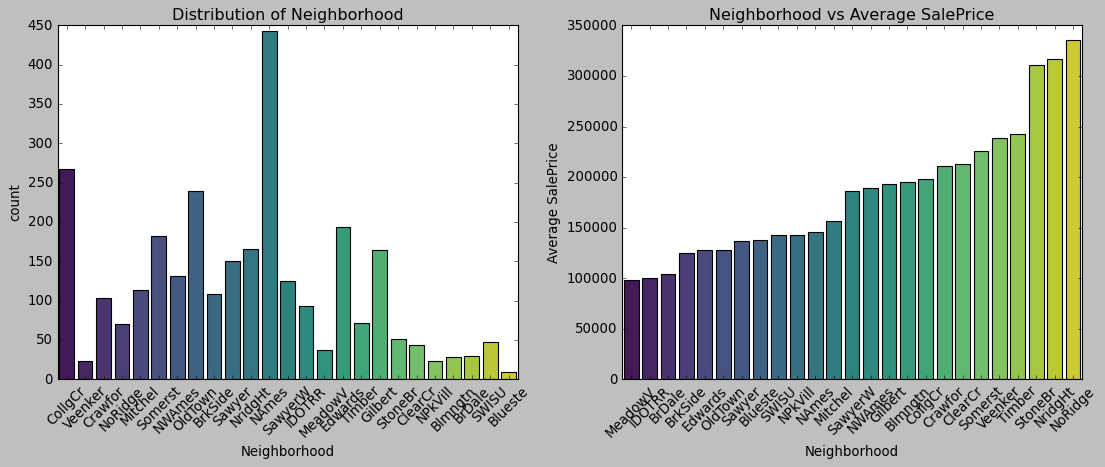

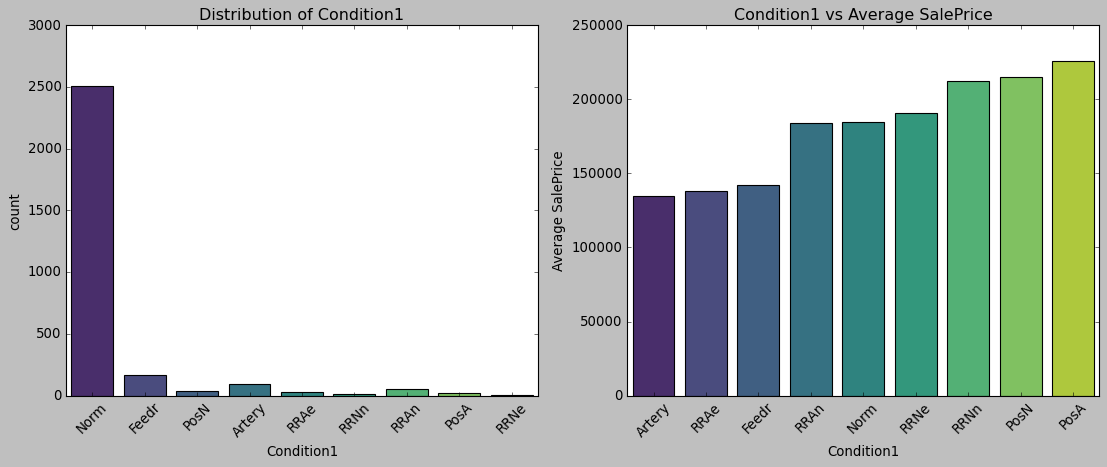

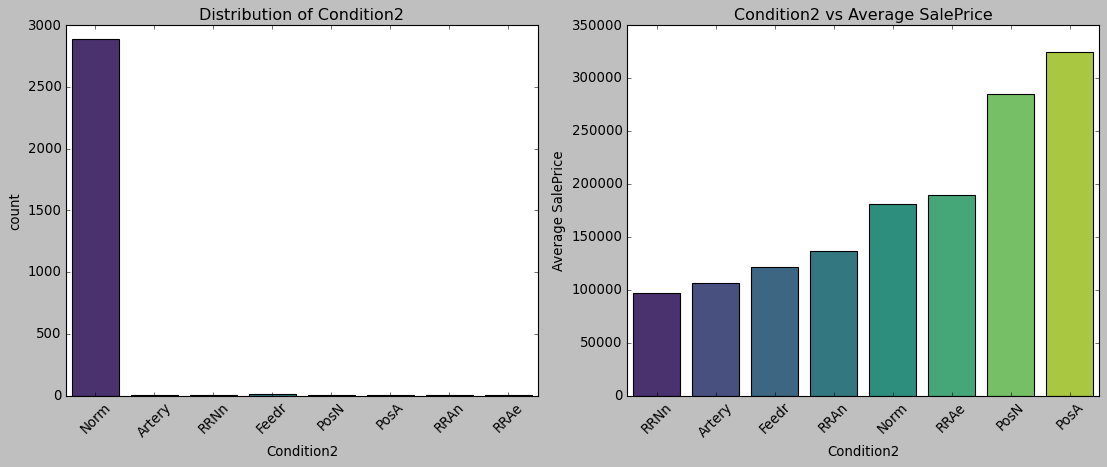

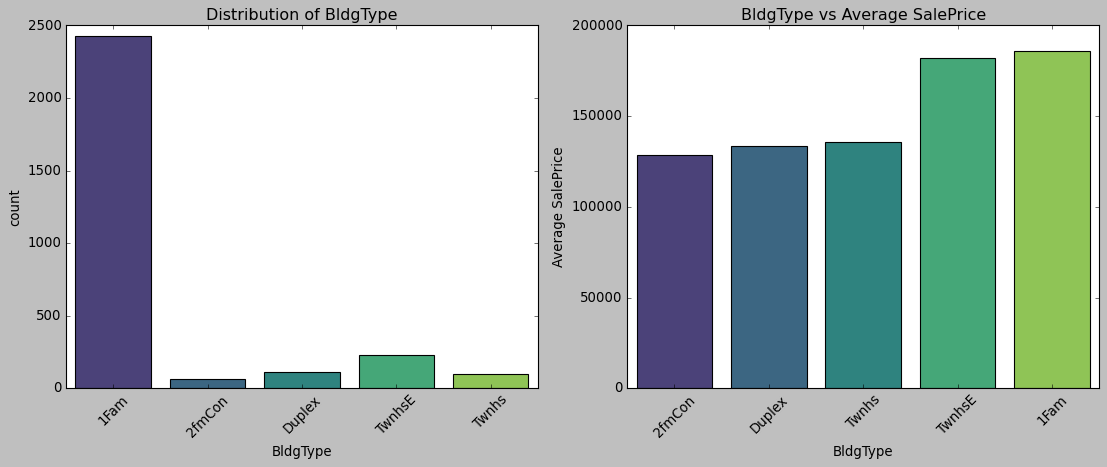

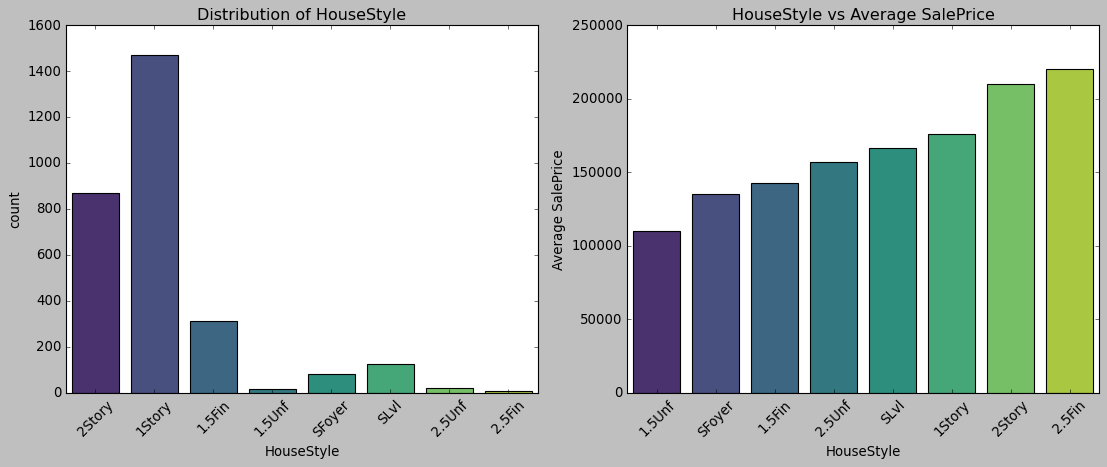

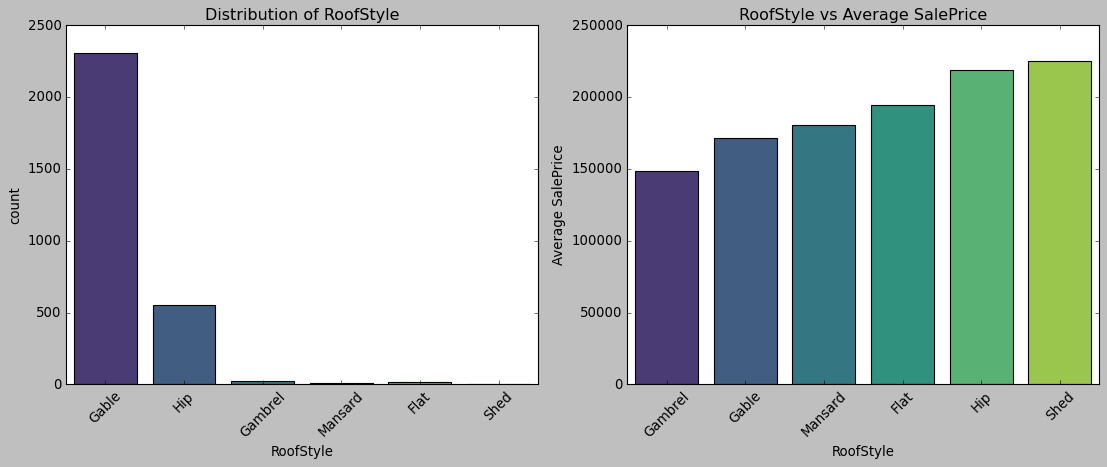

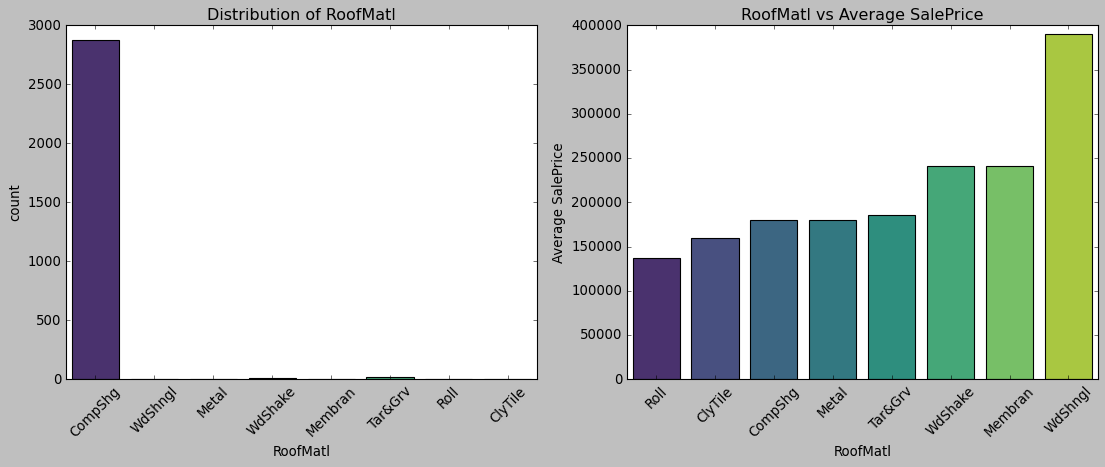

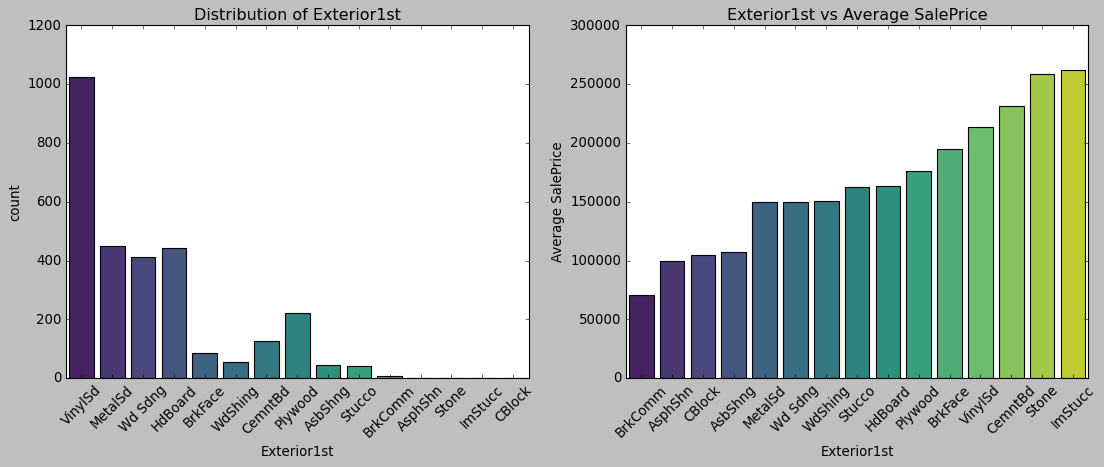

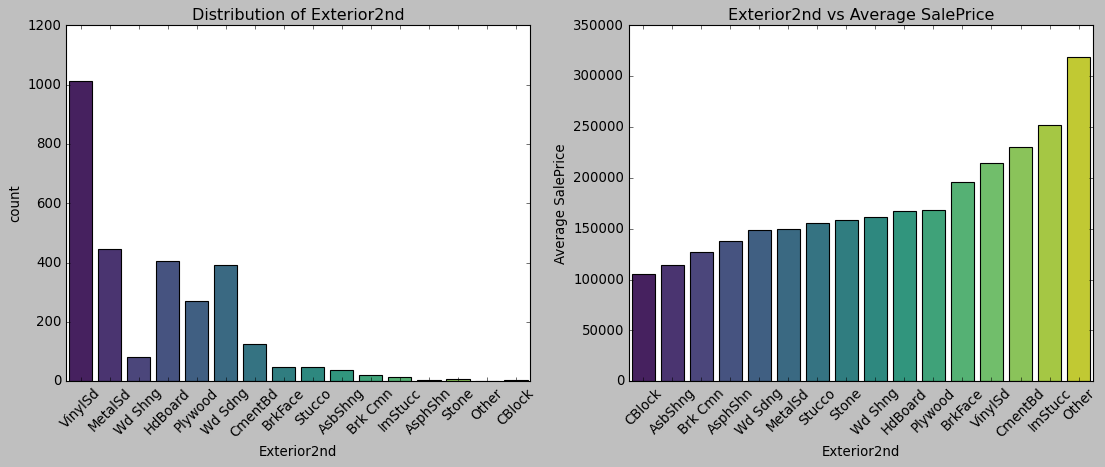

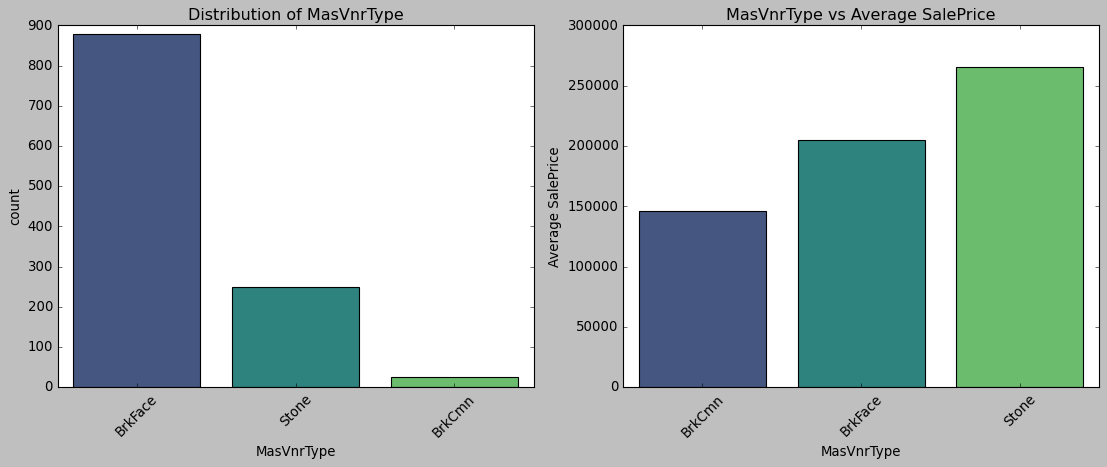

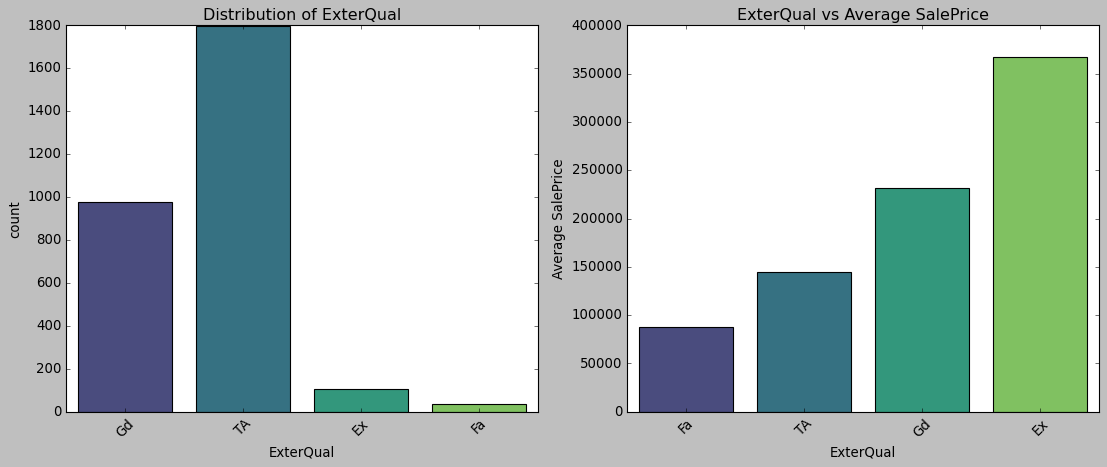

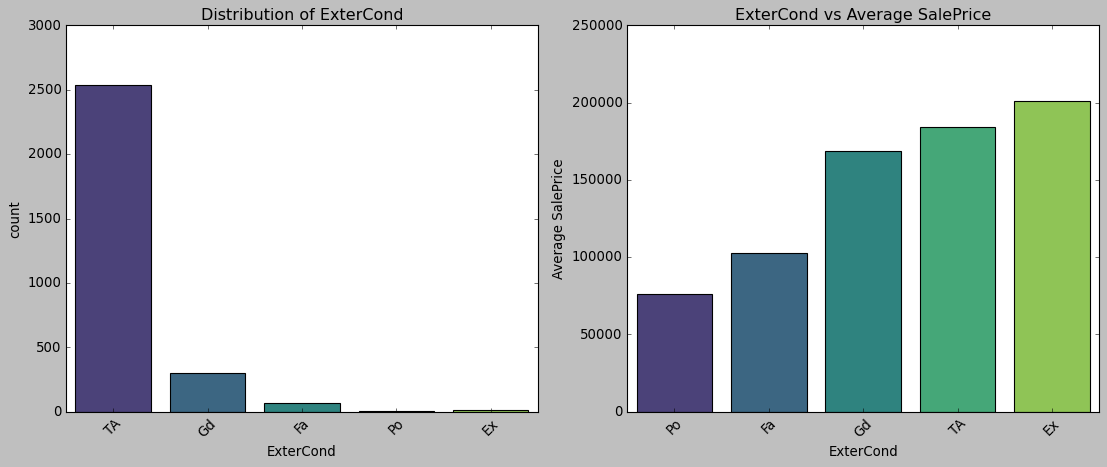

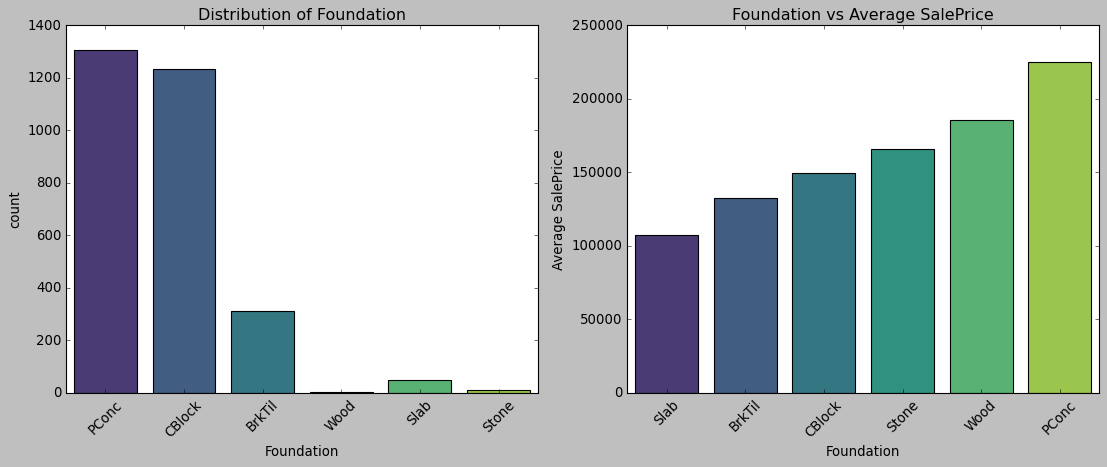

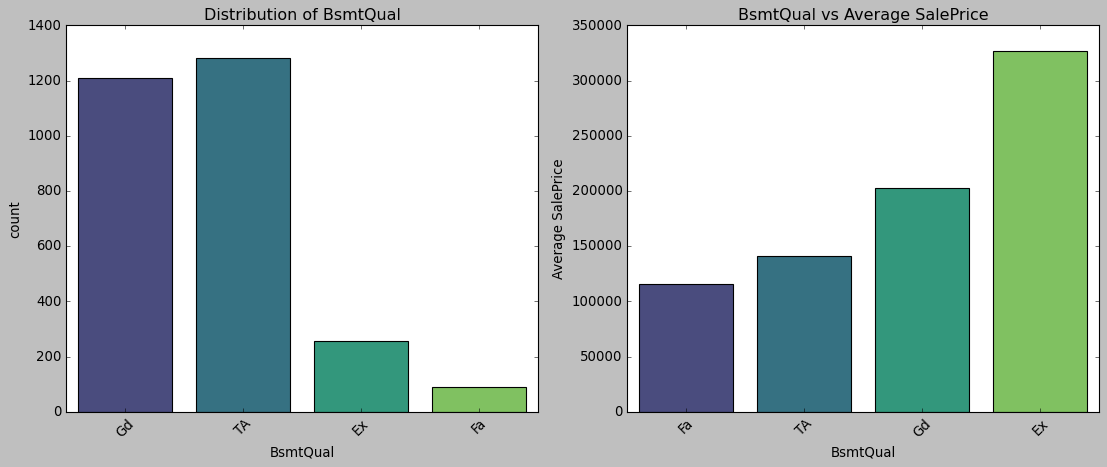

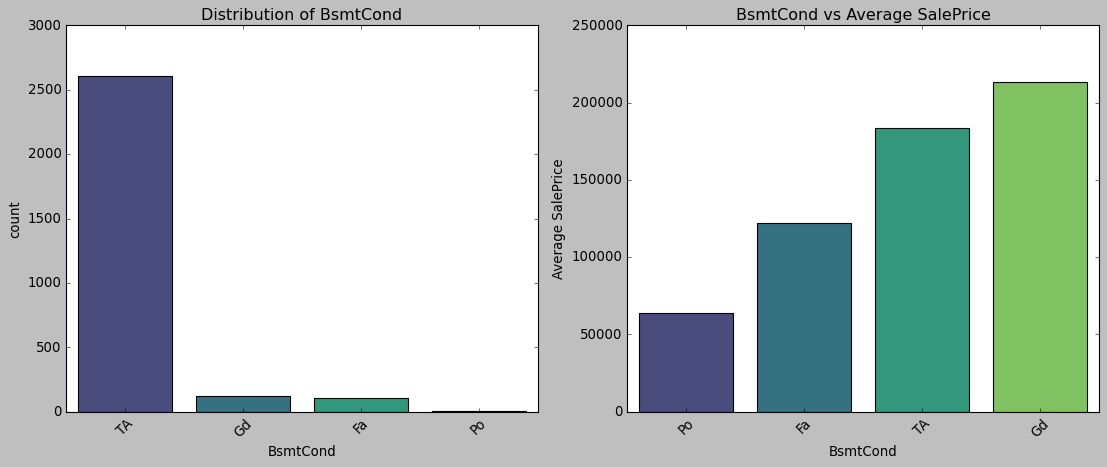

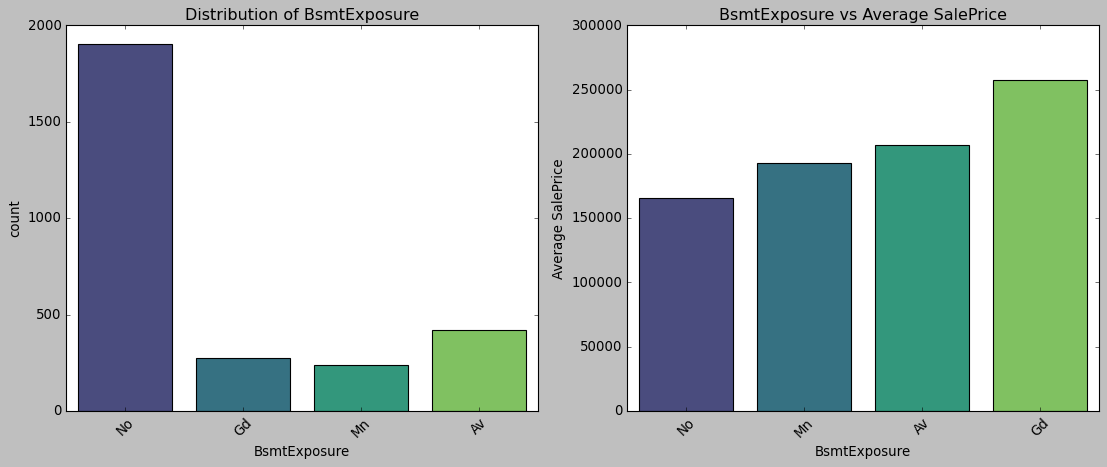

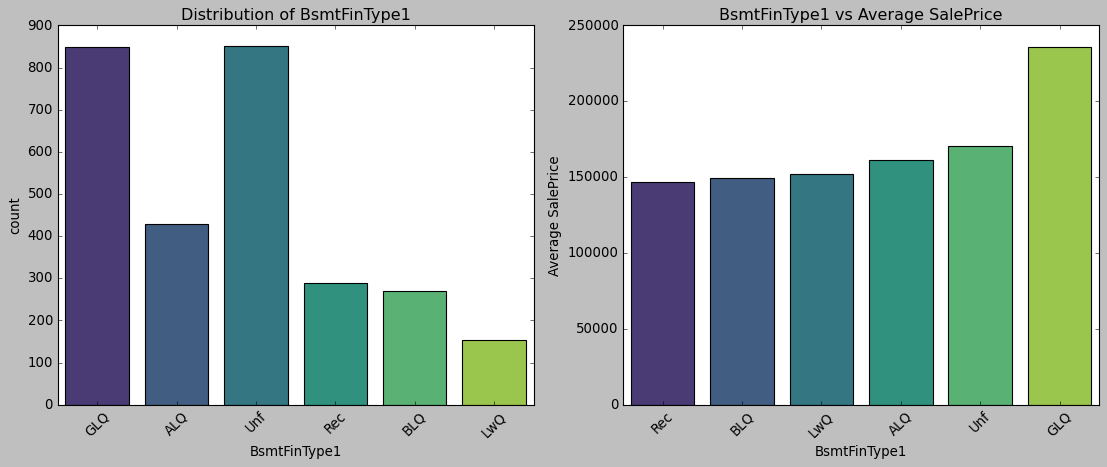

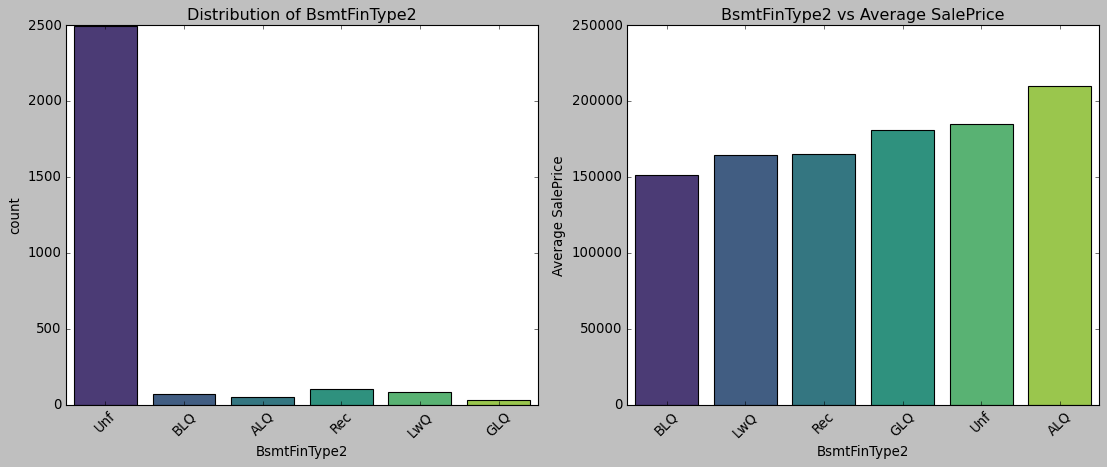

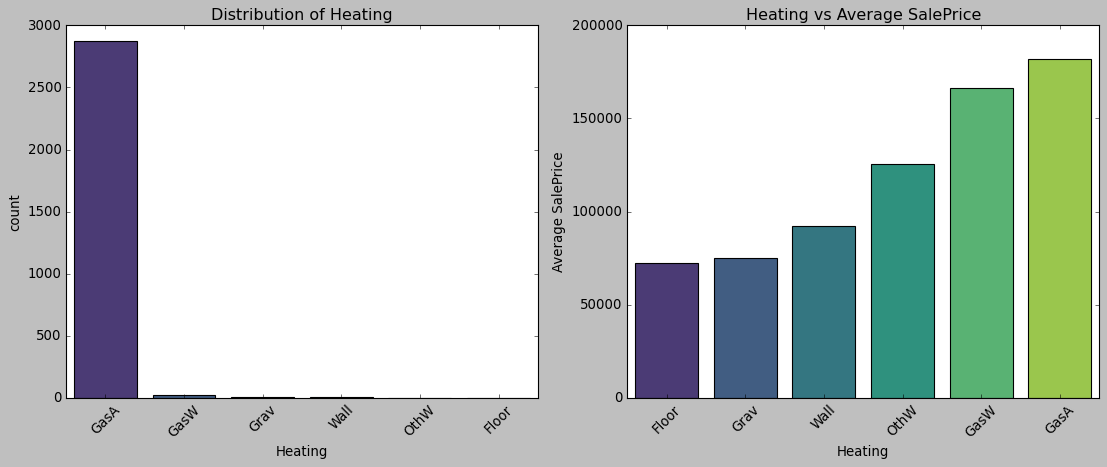

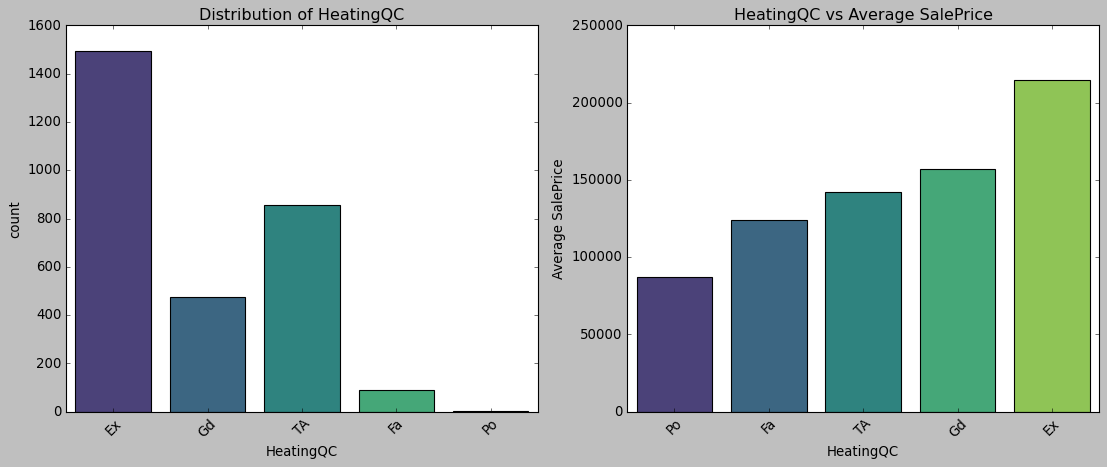

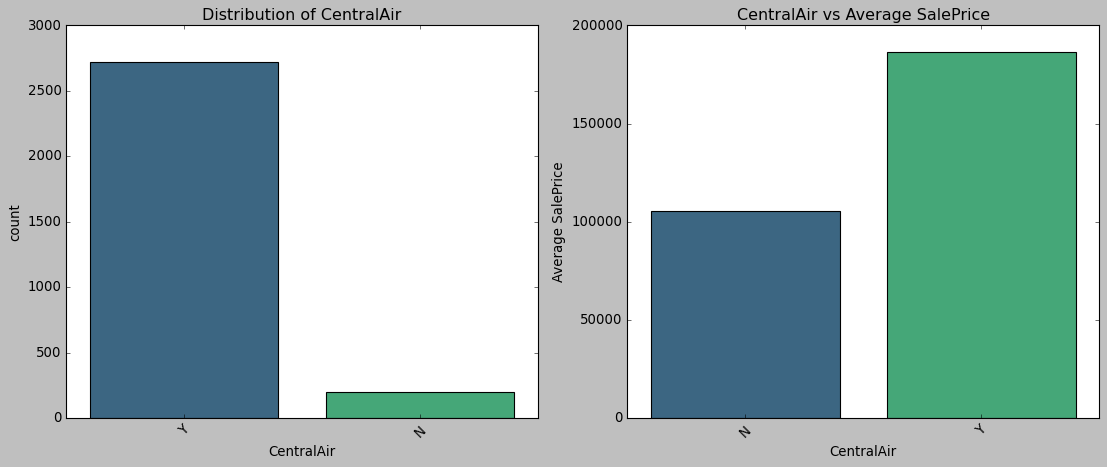

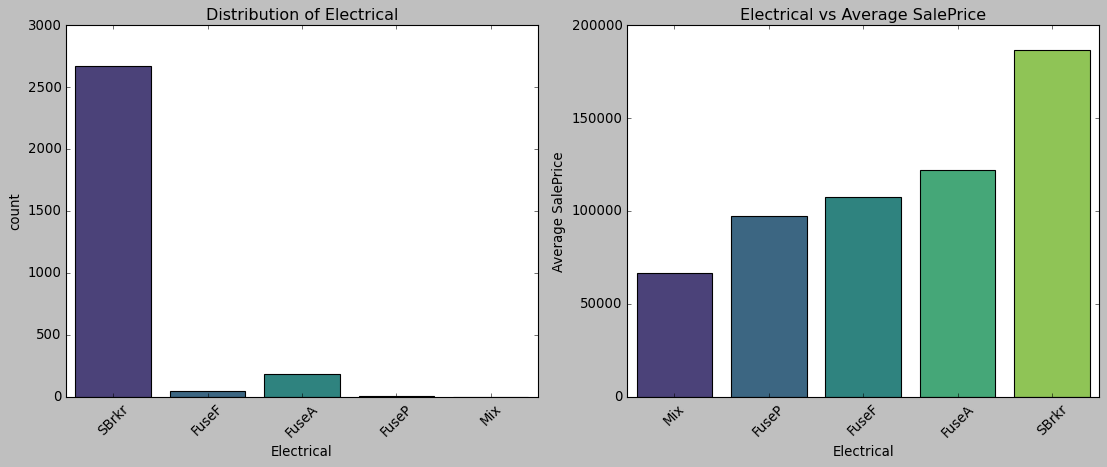

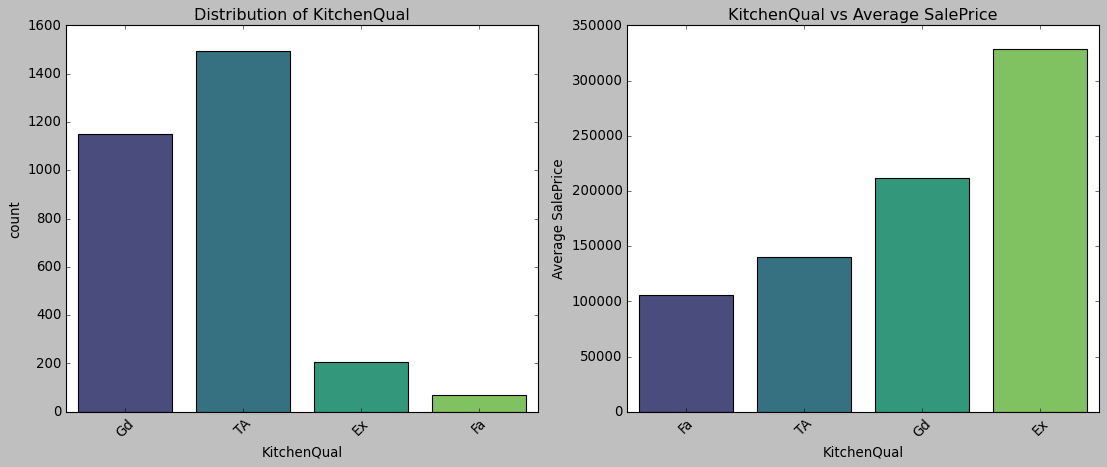

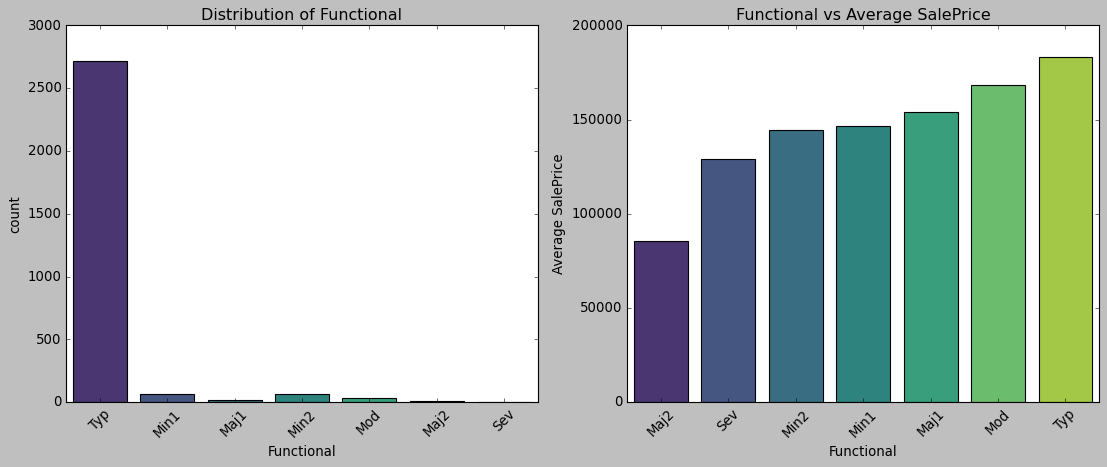

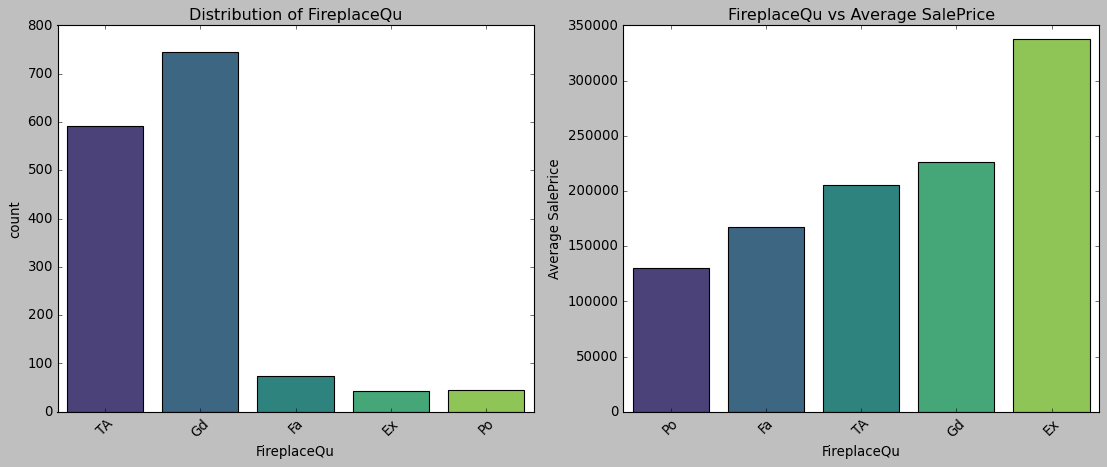

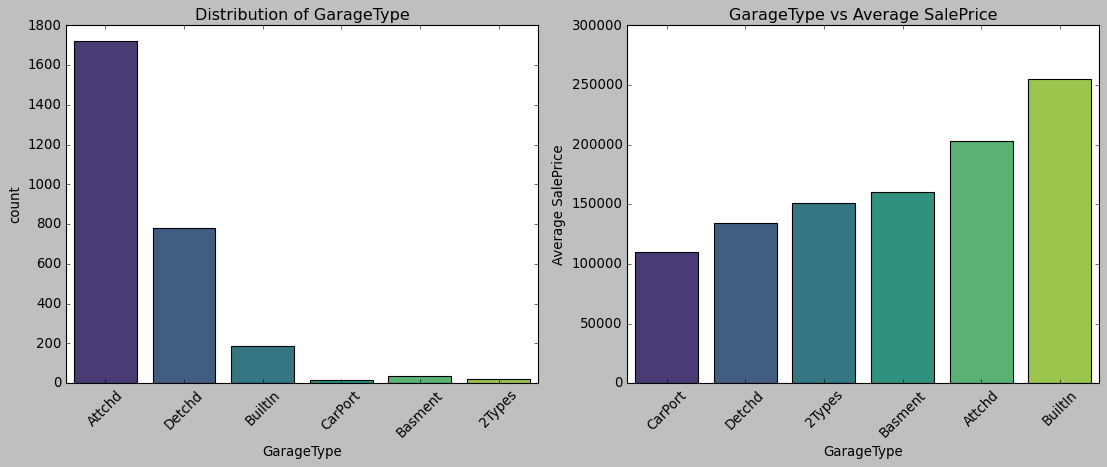

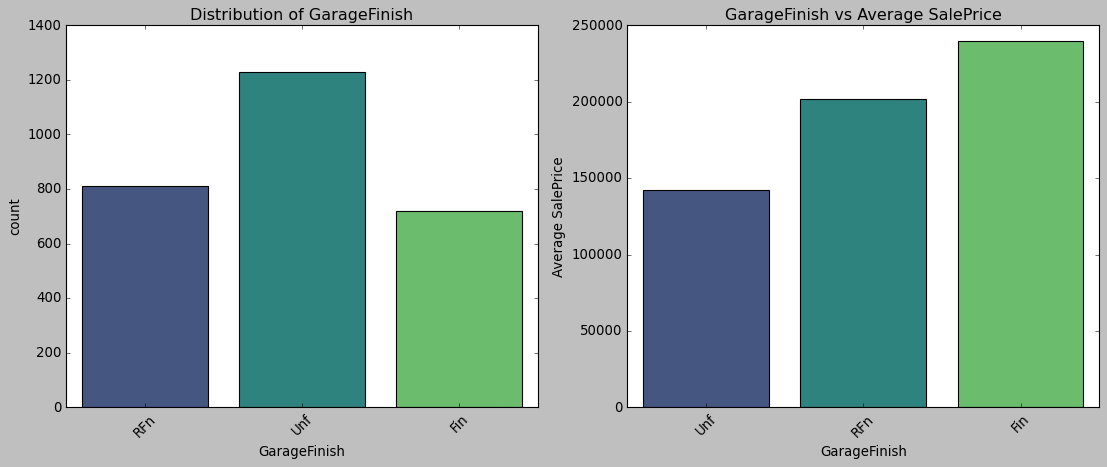

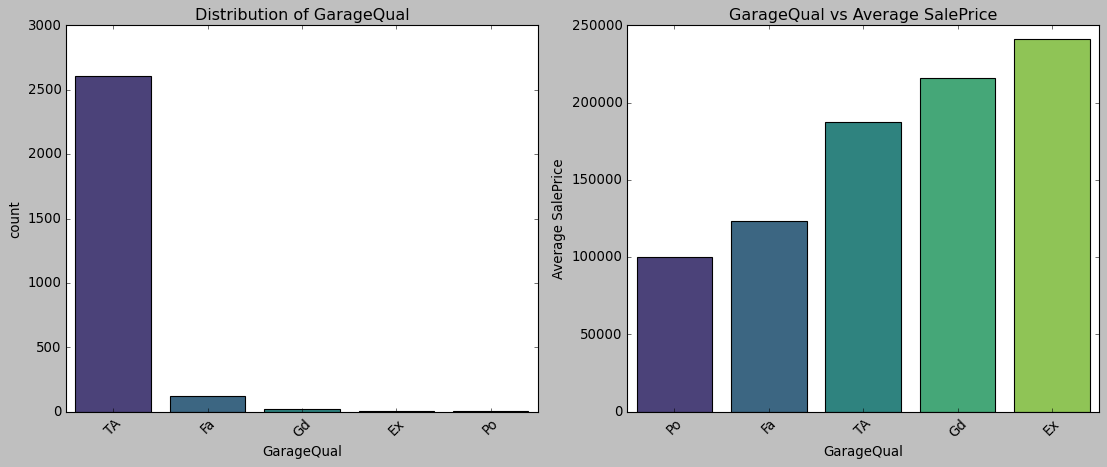

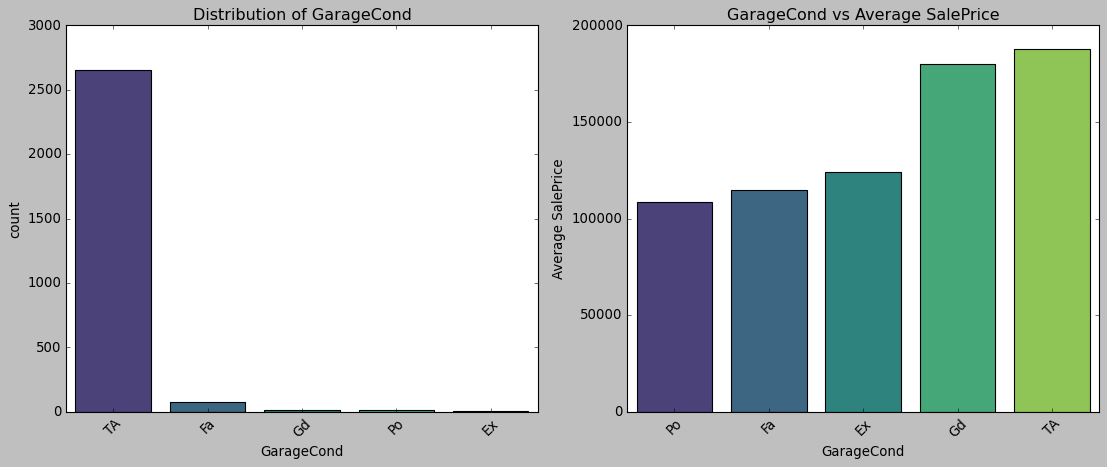

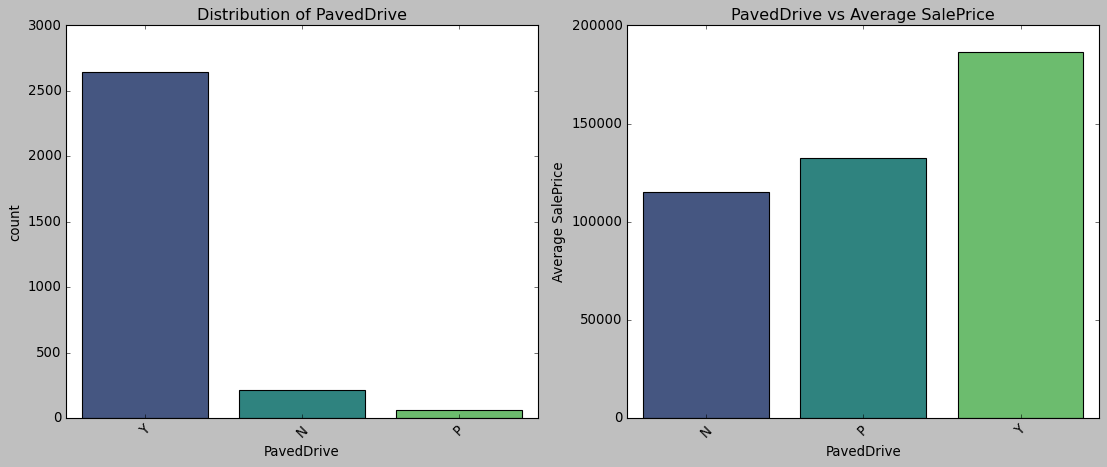

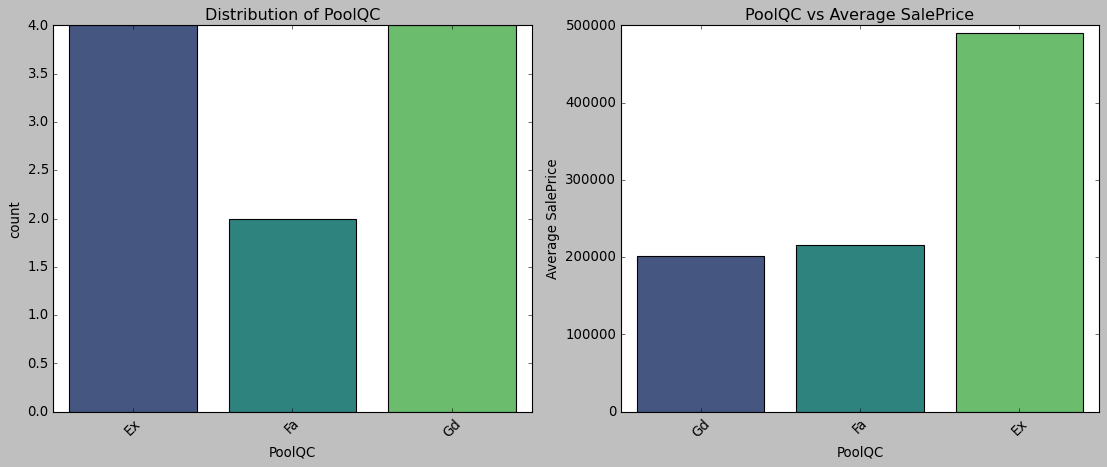

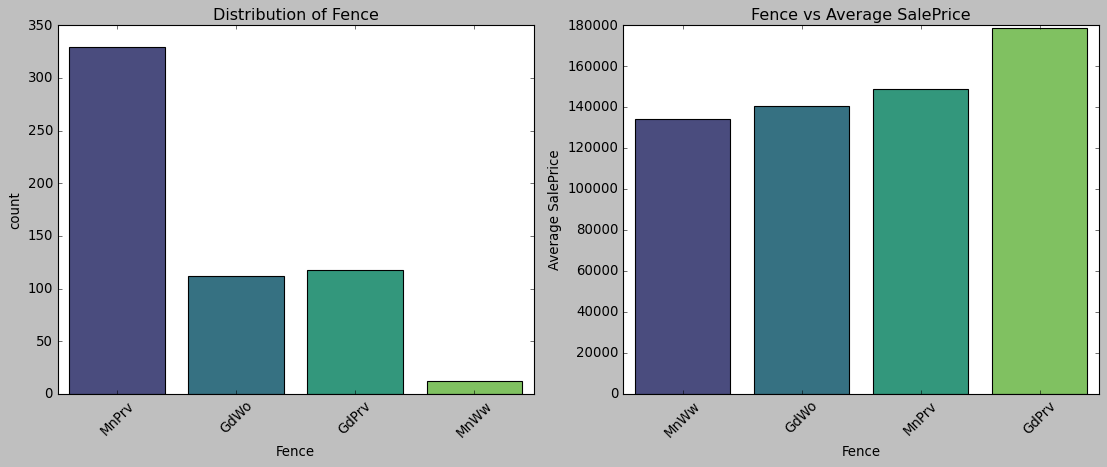

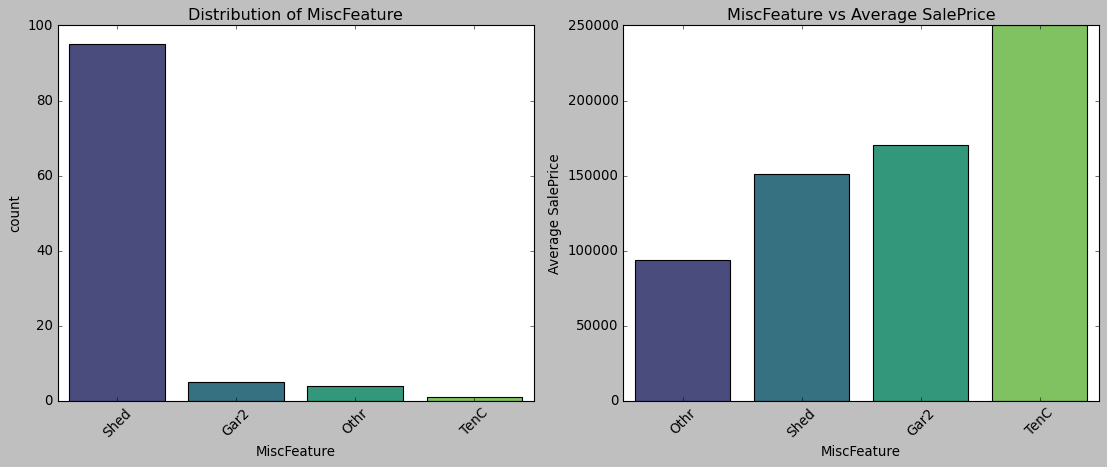

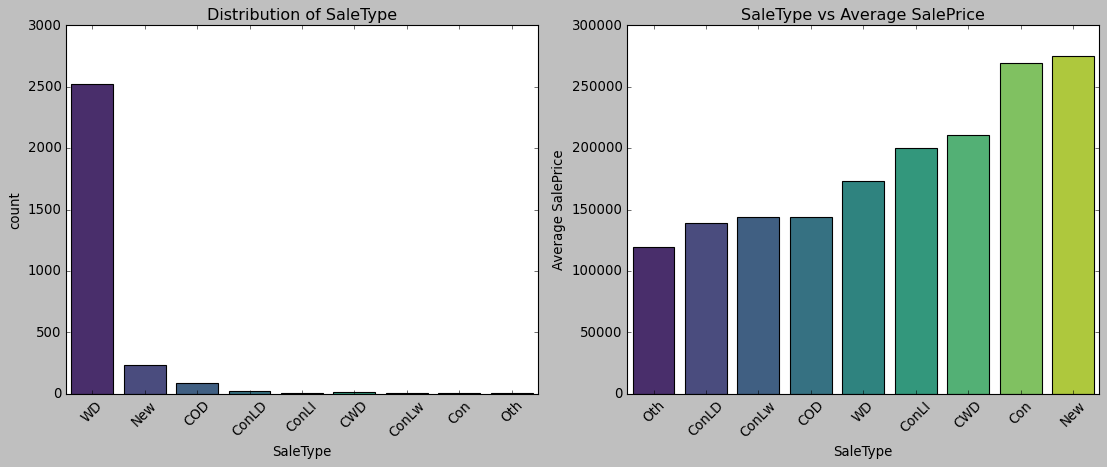

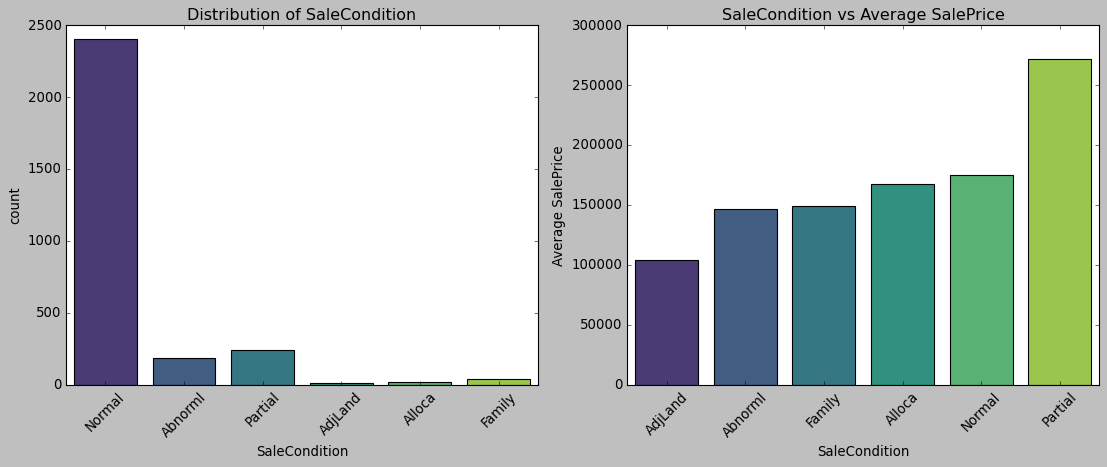

In [73]:
# Variables categóricas incluidas en el análisis
categorical_features = [
    'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 
    'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 
    'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 
    'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# Crear gráficas para cada variable categórica y su relación con SalePrice
for feature in categorical_features:
    plt.figure(figsize=(14, 6))
    
    # Distribución de cada categoría en la variable
    plt.subplot(1, 2, 1)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)

    # Relación entre categoría y el precio de venta promedio
    plt.subplot(1, 2, 2)
    mean_price_by_category = df.groupby(feature)['SalePrice'].mean().sort_values()
    sns.barplot(x=mean_price_by_category.index, y=mean_price_by_category.values, palette='viridis')
    plt.title(f'{feature} vs Average SalePrice')
    plt.xticks(rotation=45)
    plt.ylabel('Average SalePrice')

    plt.tight_layout()
    plt.show()

### 6. Análisis de relaciones entre variableas

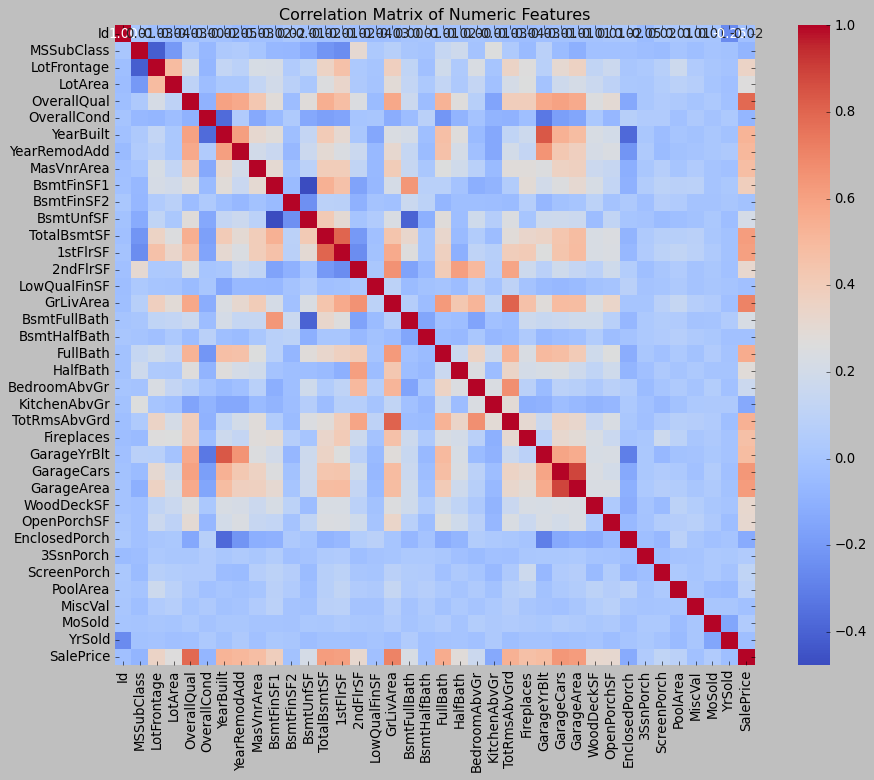

In [75]:
# 6.1 Matriz de correlación

# Seleccionar solo las columnas numéricas para evitar el error
numeric_df = df.select_dtypes(include=[np.number])

# 6.1 Matriz de correlación
plt.figure(figsize=(14, 10))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

C:\Users\helen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

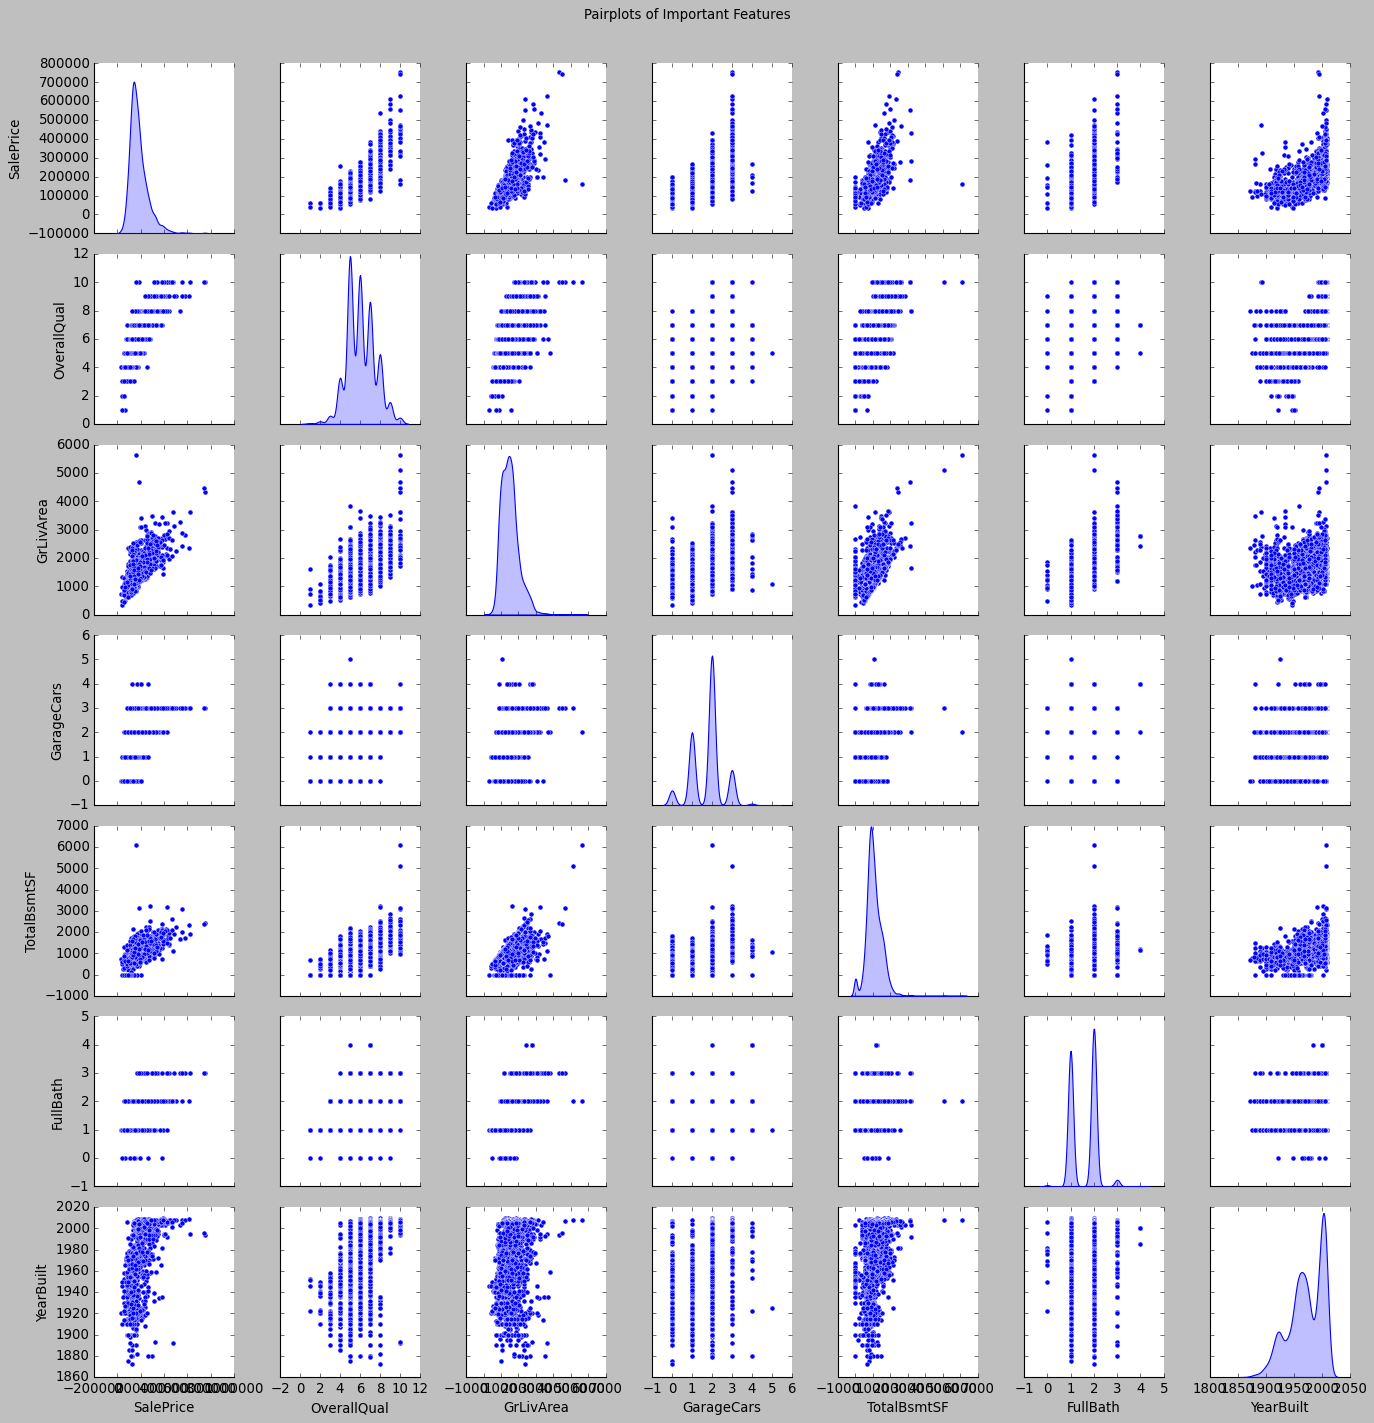

In [76]:
# 6.2 Pairplots para variables importantes
# Selecciona las variables numéricas más correlacionadas con SalePrice, según el análisis previo.
important_vars = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[important_vars], diag_kind='kde')
plt.suptitle('Pairplots of Important Features', y=1.02)
plt.show()

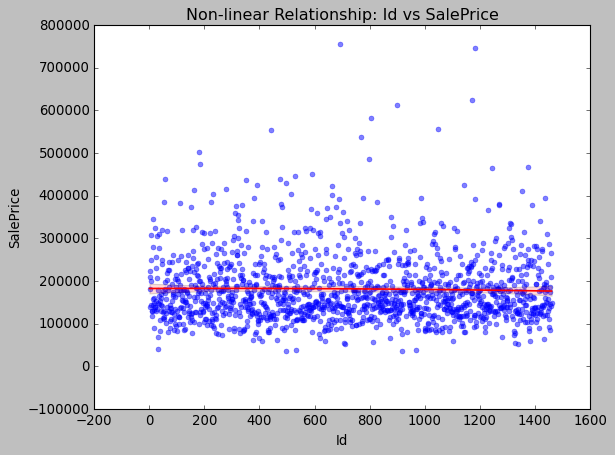

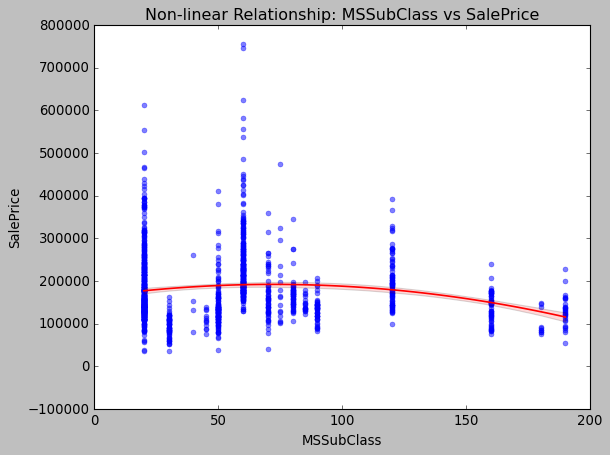

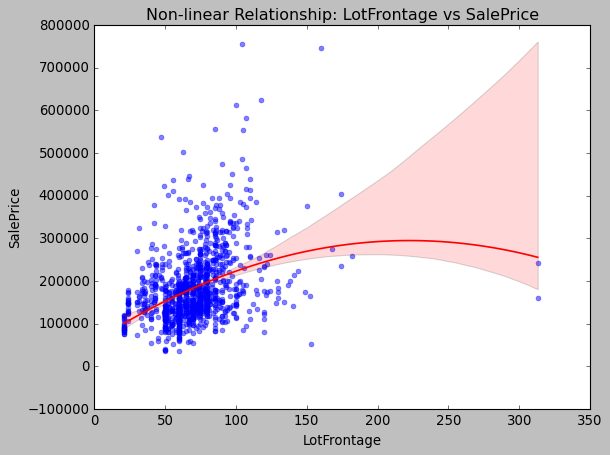

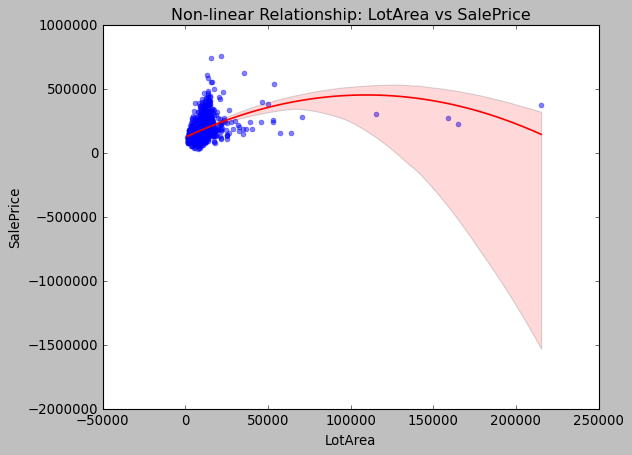

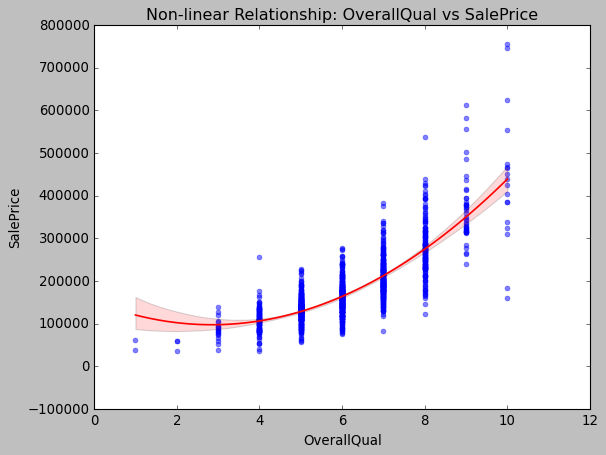

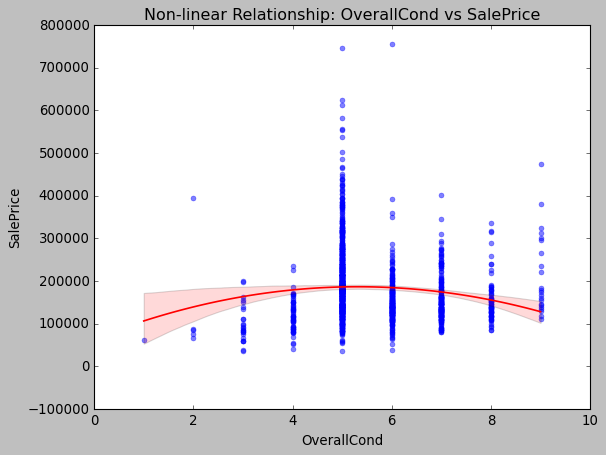

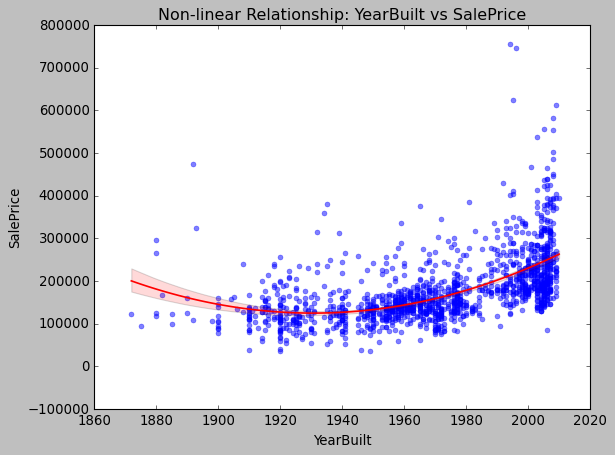

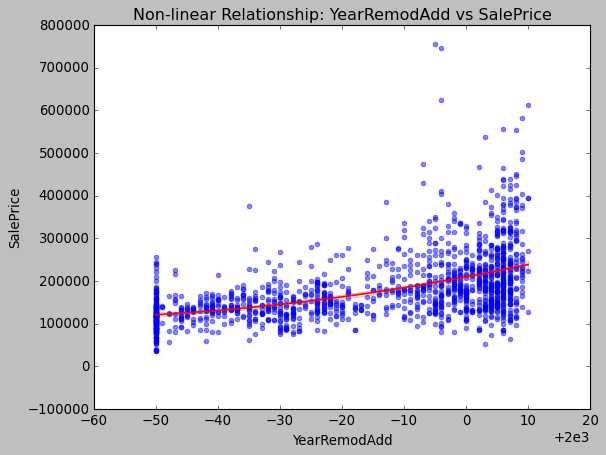

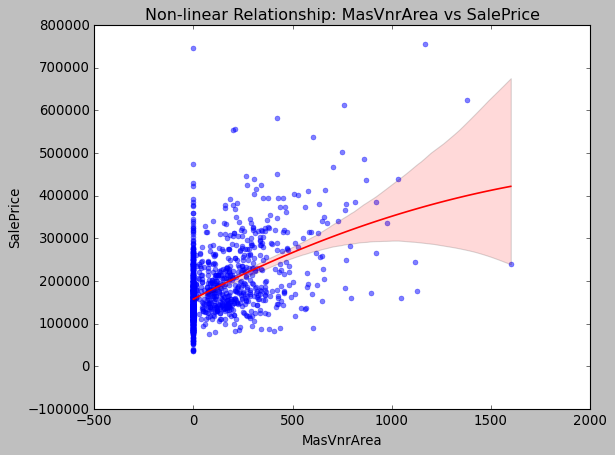

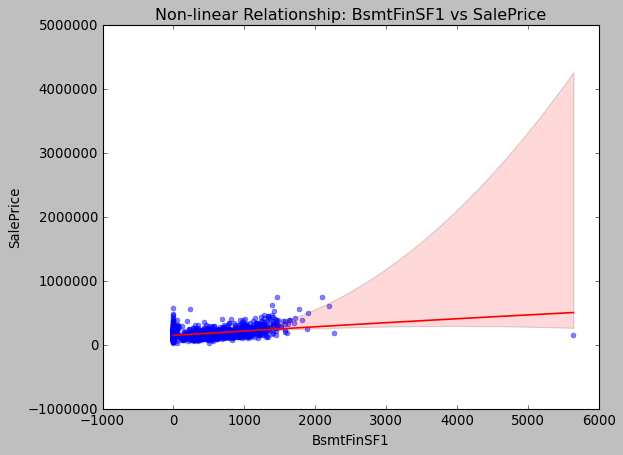

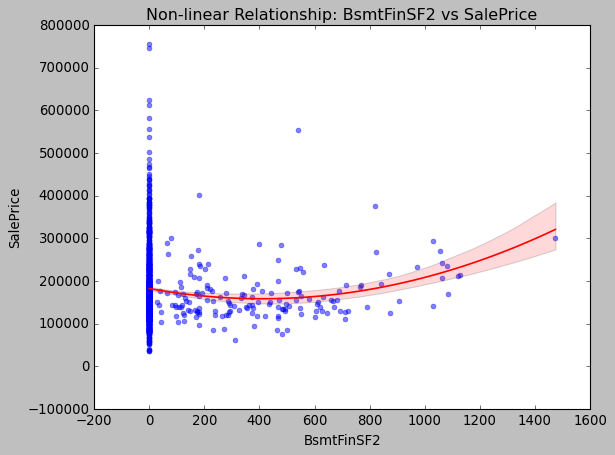

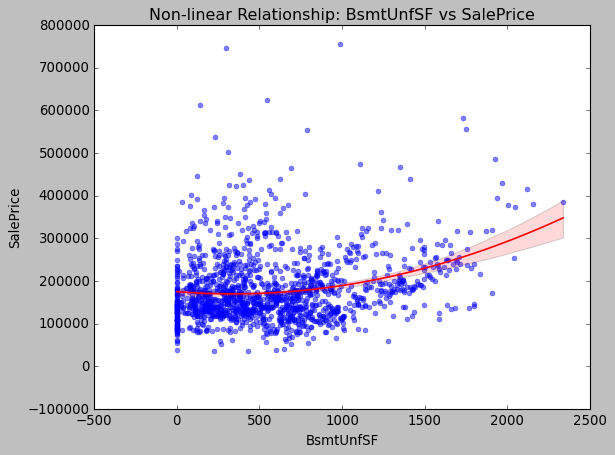

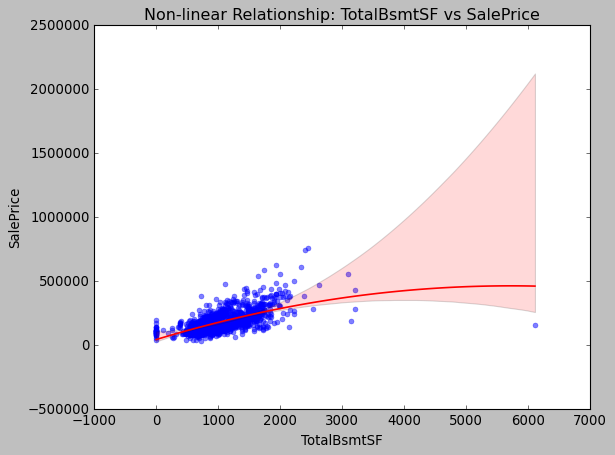

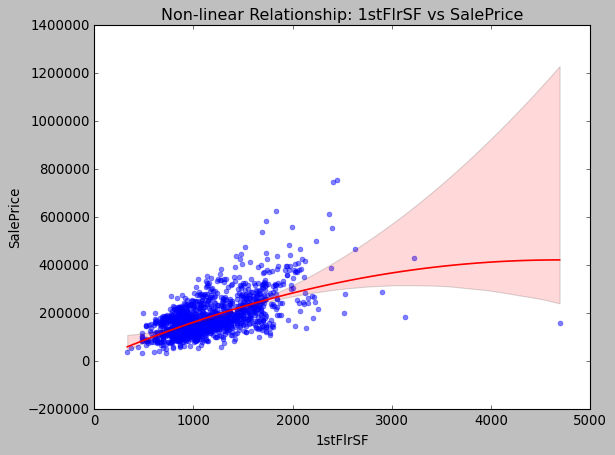

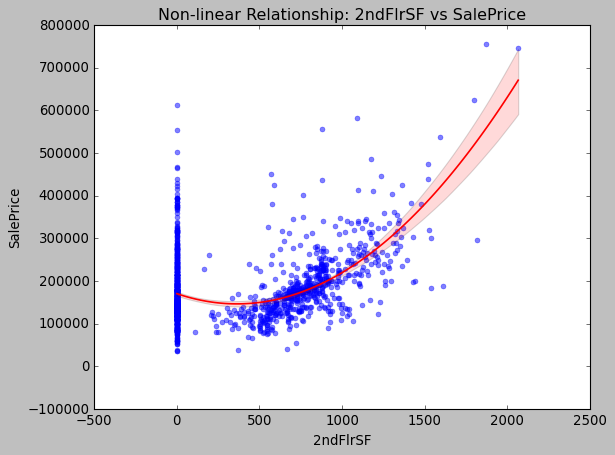

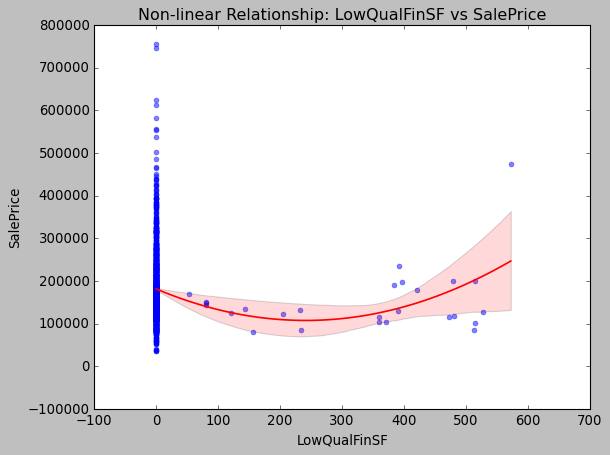

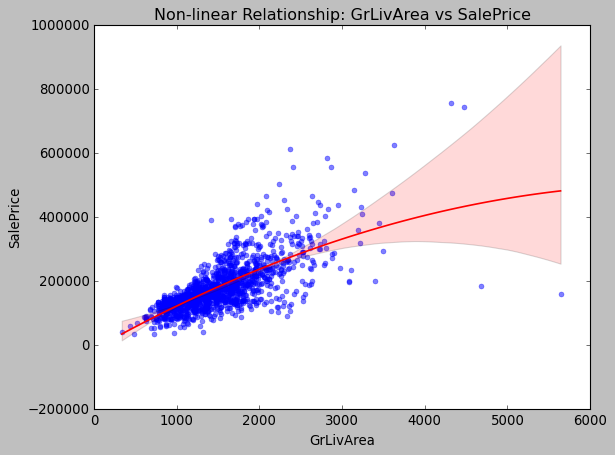

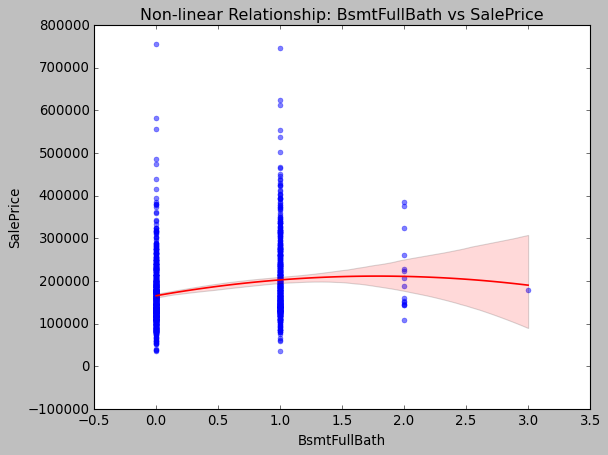

C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x

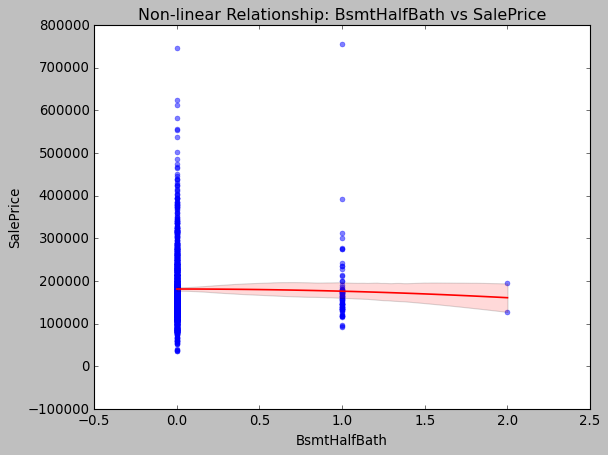

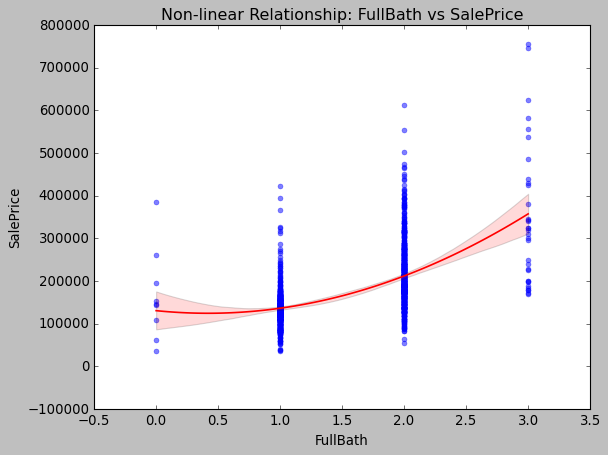

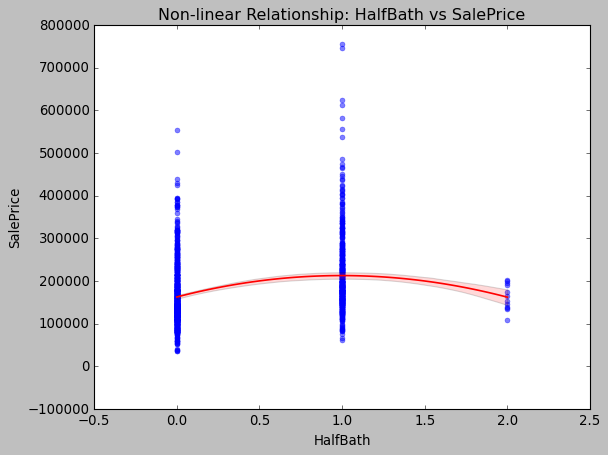

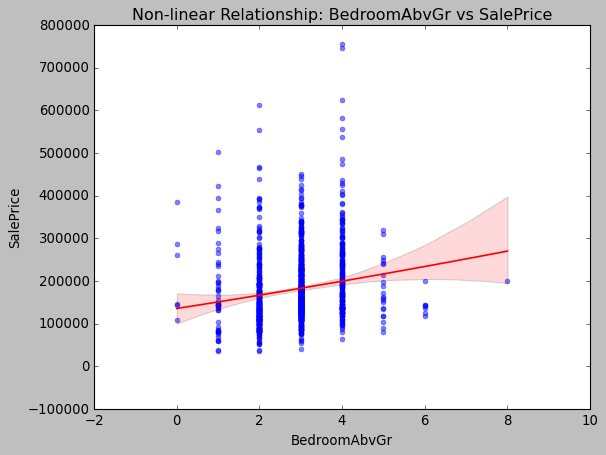

C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x

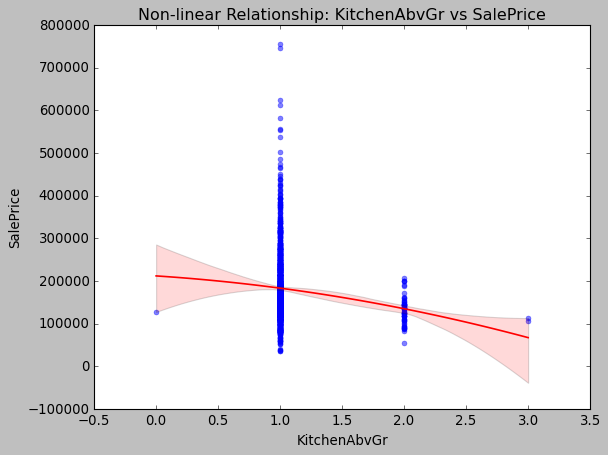

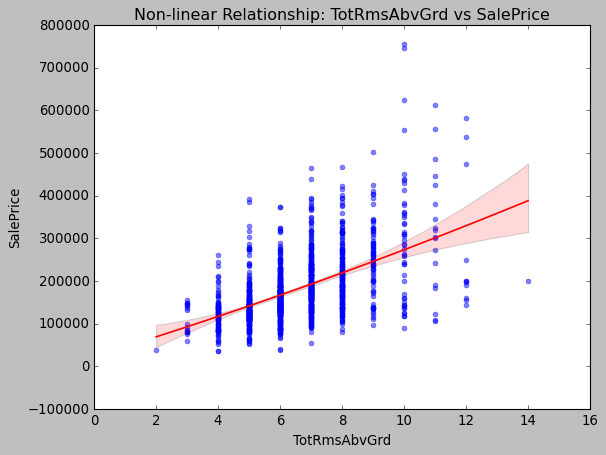

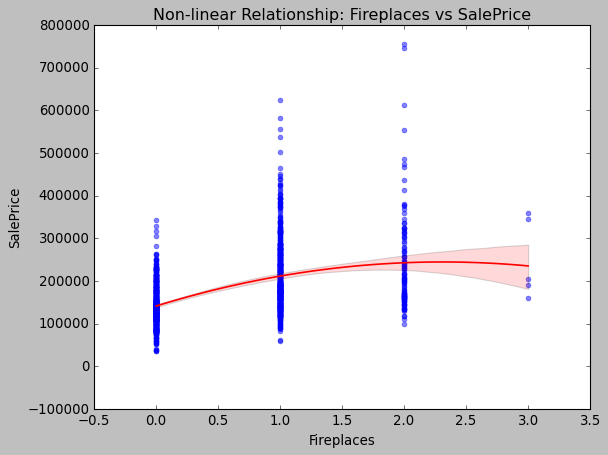

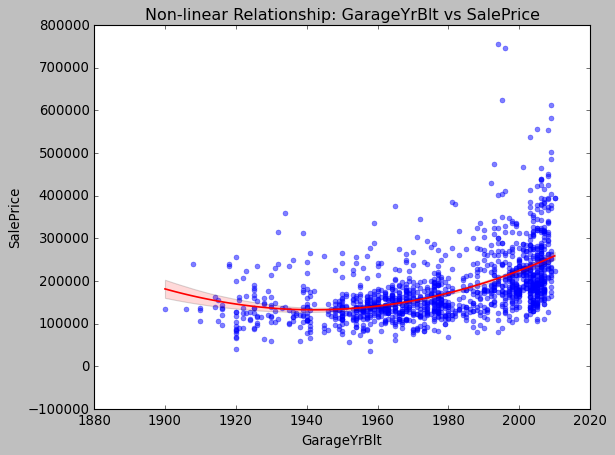

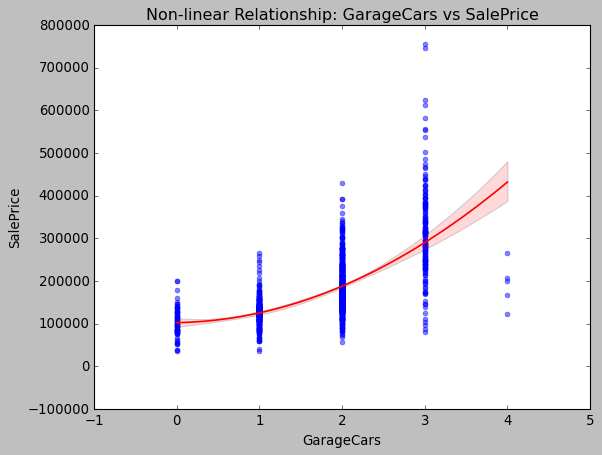

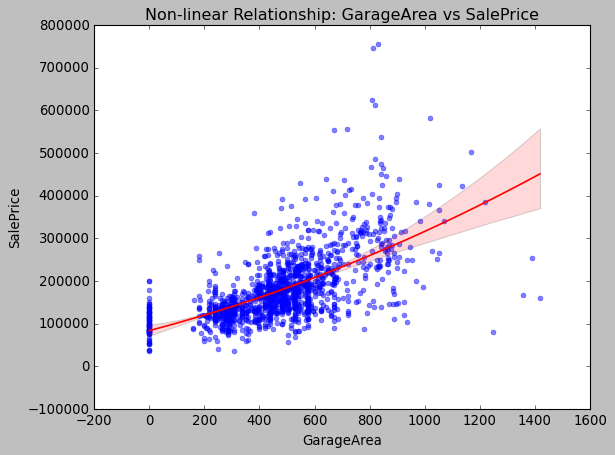

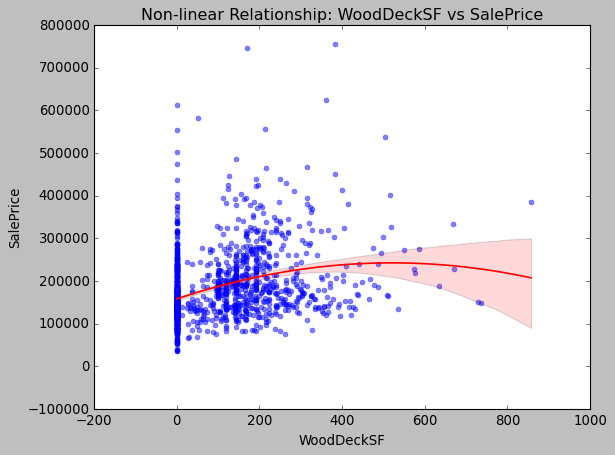

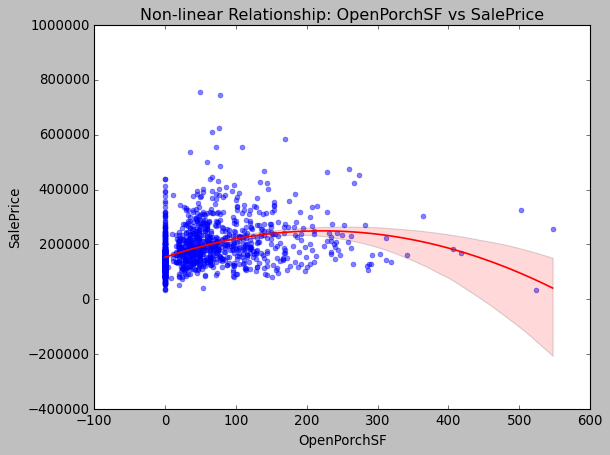

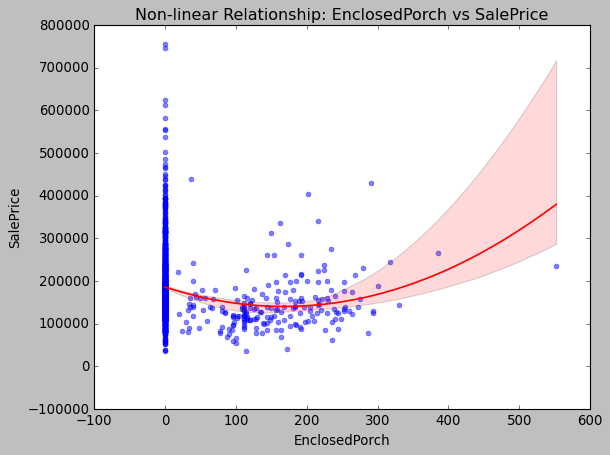

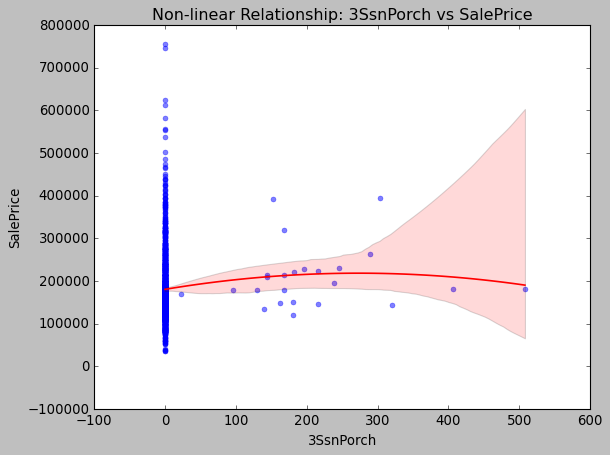

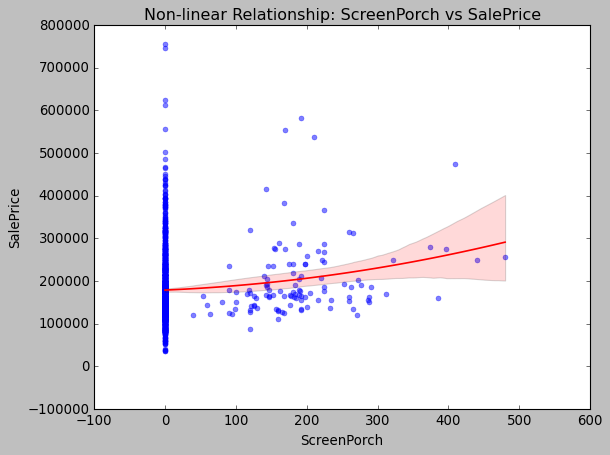

C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\helen\anaconda3\Lib\site-packages\seaborn\regression.py:251: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x

LinAlgError: SVD did not converge in Linear Least Squares

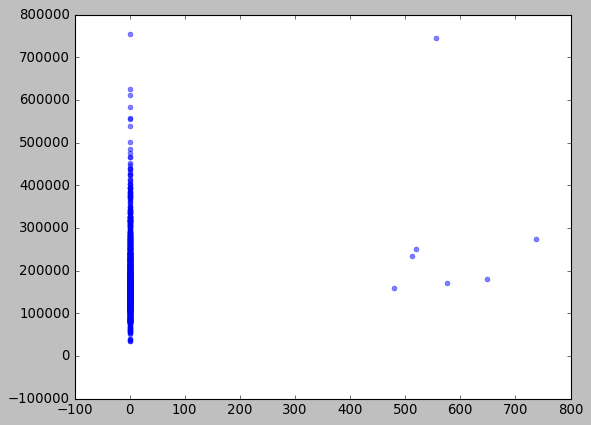

In [77]:
# 6.3 Análisis de relaciones no lineales para todas las variables numéricas
for column in numeric_df.columns:
    if column != 'SalePrice':  # Evitar la variable SalePrice en el eje x
        plt.figure(figsize=(8, 6))
        
        # Ajustar regresión no lineal con polinomio de segundo grado (order=2)
        sns.regplot(x=column, y='SalePrice', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'}, order=2)
        
        # Título dinámico basado en la variable
        plt.title(f'Non-linear Relationship: {column} vs SalePrice')
        plt.show()

In [ ]:
## 5. Análisis de características individuales

### 5.1 Variables numéricas
- Distribuciones
- Correlaciones con SalePrice

### 5.2 Variables categóricas
- Distribución de categorías
- Relación con SalePrice

## 6. Análisis de relaciones entre variables

### 6.1 Matriz de correlación
### 6.2 Pairplots para variables importantes
### 6.3 Análisis de relaciones no lineales

## 7. Preparación de datos

### 7.1 Manejo de valores faltantes
### 7.2 Transformación de variables
### 7.3 Codificación de variables categóricas
### 7.4 Creación de nuevas características

## 8. Selección de características

### 8.1 Importancia de características
### 8.2 Eliminación de características redundantes

## 9. Modelado

### 9.1 División de datos en entrenamiento y prueba
### 9.2 Selección de algoritmos de regresión
### 9.3 Entrenamiento de modelos
### 9.4 Evaluación inicial de modelos

## 10. Evaluación y ajuste del modelo

### 10.1 Análisis de rendimiento en datos de prueba
### 10.2 Diagnóstico de sobreajuste/subajuste
### 10.3 Ajuste de hiperparámetros

## 11. Interpretación de resultados

### 11.1 Importancia de características en el modelo final
### 11.2 Análisis de coeficientes/pesos del modelo

## 12. Validación y generalización

### 12.1 Validación cruzada
### 12.2 Discusión de limitaciones y posibles mejoras